In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import gsw
import xarray as xr
from matplotlib import pyplot as plt
from scipy import interpolate

from glob import glob

In [6]:
def get_nutricline(crit, nprof, z):
    # use linear interpolation to find depth of nutricline based on critical value
    # first sort the profile so it is descending with depth
    
    f = interpolate.interp1d(nprof, z, 'quadratic')
    znut = f(crit)
    
    if znut <= np.min(z):
        znut = np.nan
    
    return znut


def get_header_line(f, enc, string):
    with open(f,encoding = enc) as myFile:
        for num, line in enumerate(myFile, 1):
            if string in line:
                return num-1
#         f.close()


def get_month(df):
    month = []
    for n in range(len(df)):
        month.append(np.int32(str(df['mon/day/yr'][n]).split('/')[0].lstrip('0   ')))
    return month

def get_casts(df):
    for c in pd.unique(df['mon/day/yr']):
        if not c.empty:
            cast = df[df['mon/day/yr']==c]
            return cast

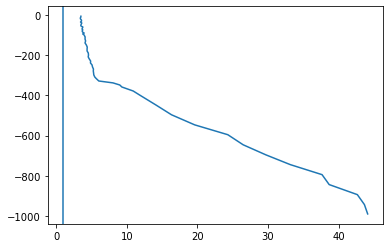

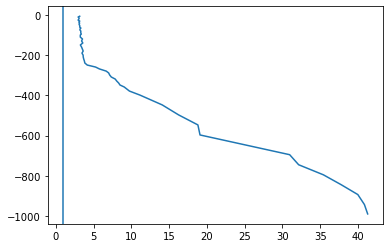

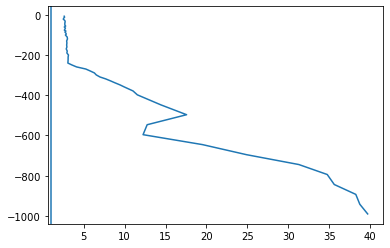

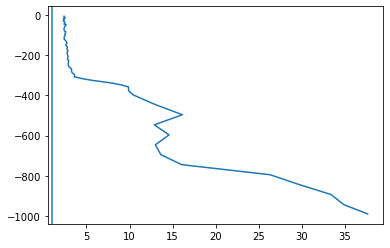

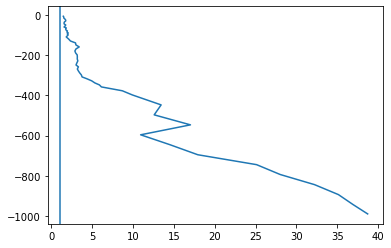

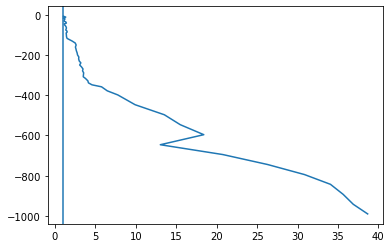

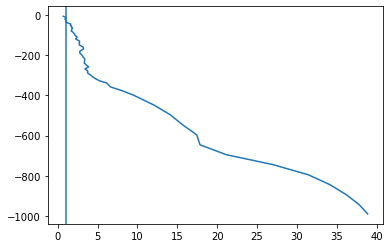

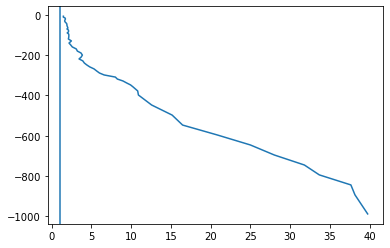

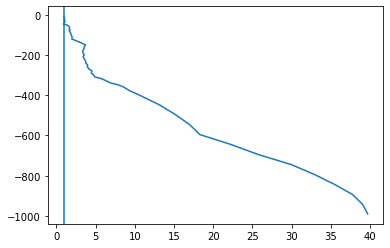

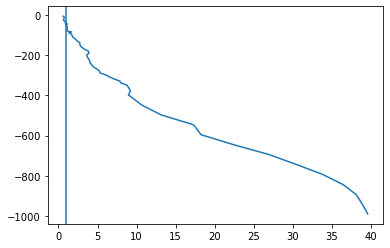

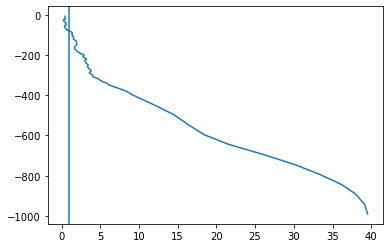

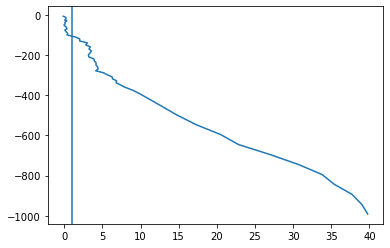

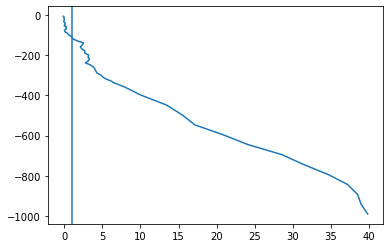

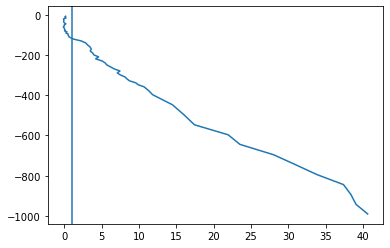

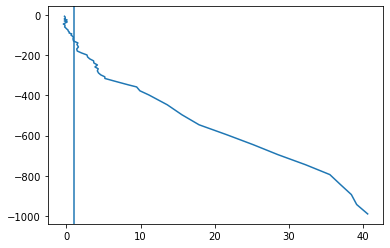

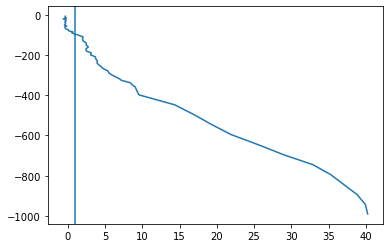

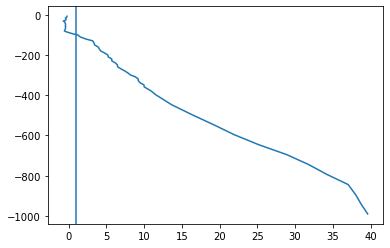

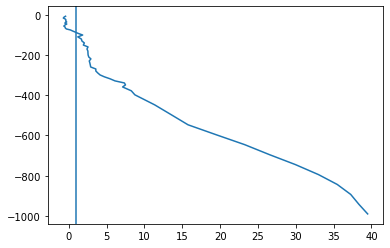

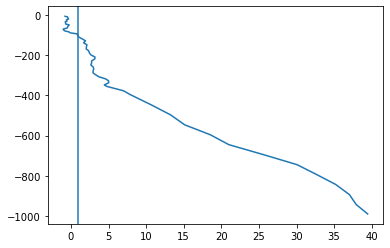

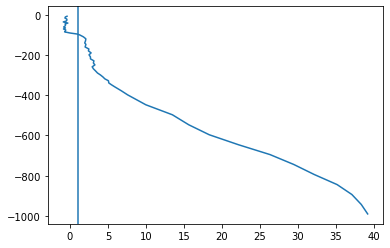

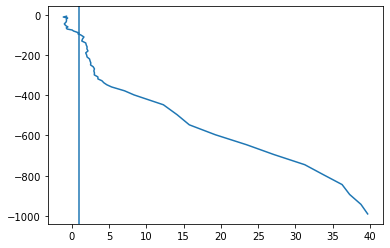

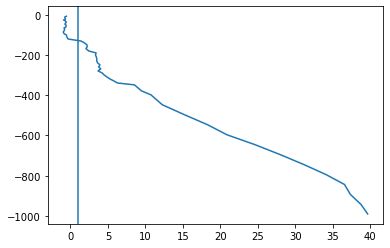

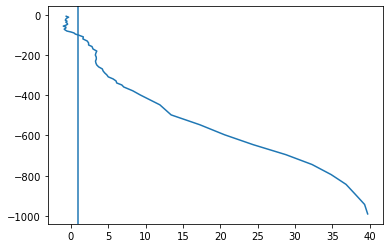

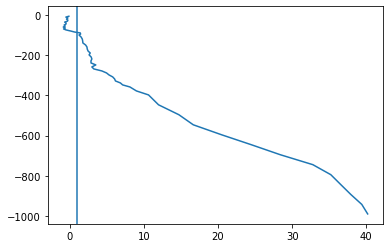

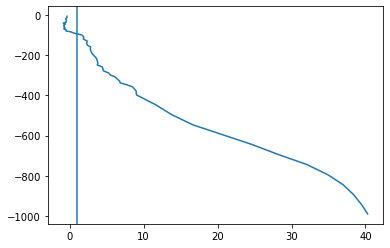

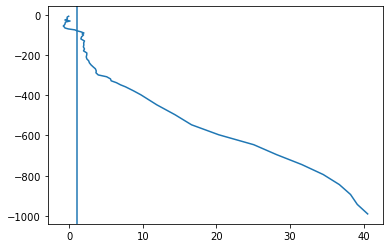

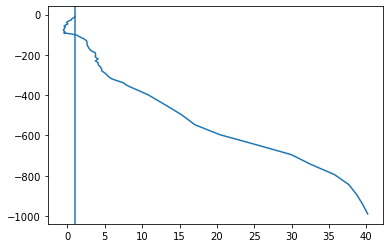

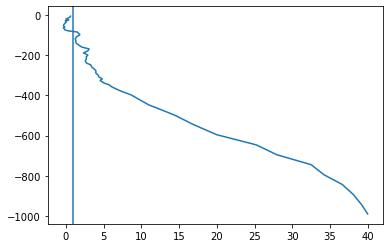

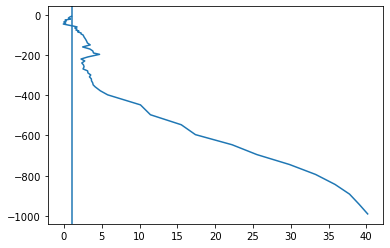

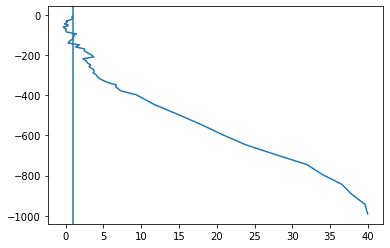

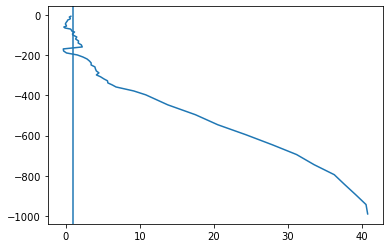

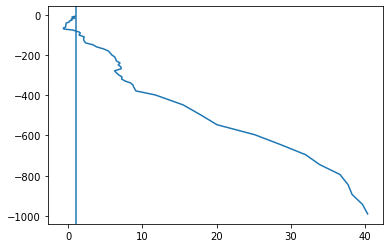

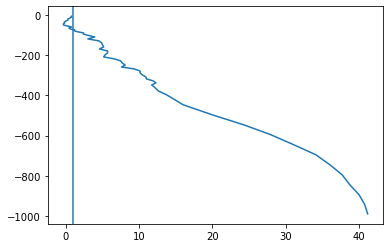

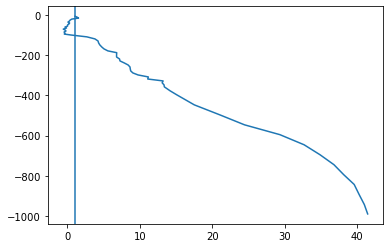

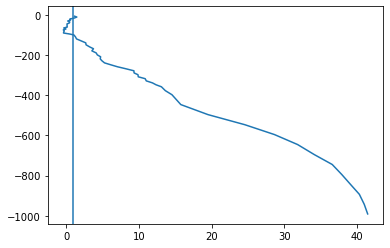

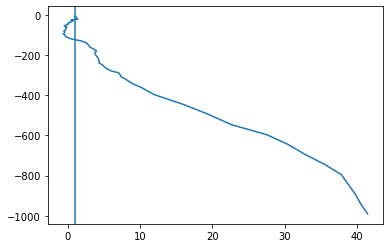

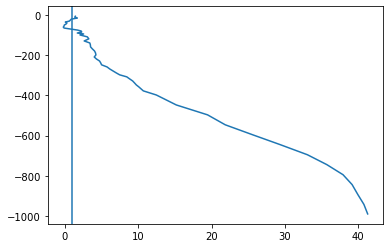

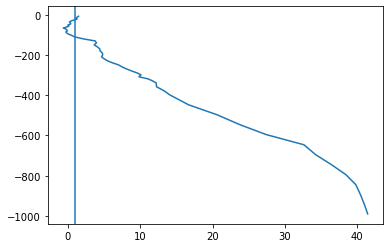

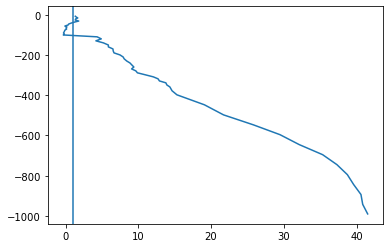

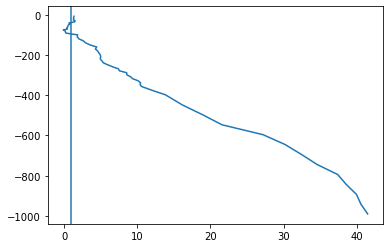

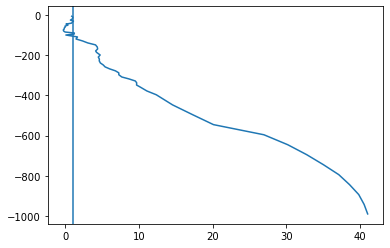

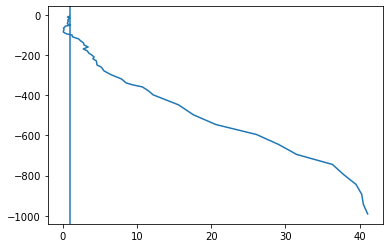

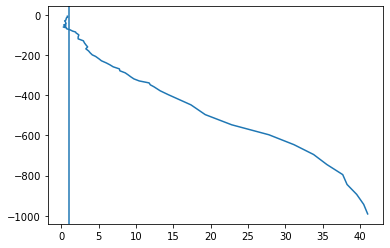

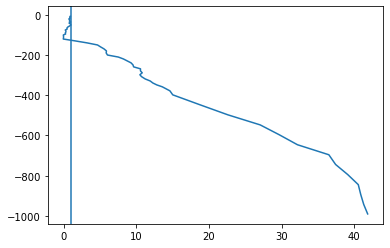

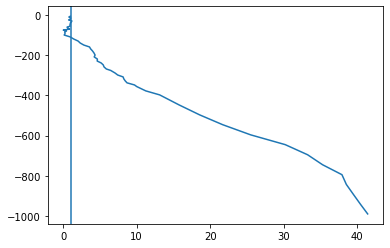

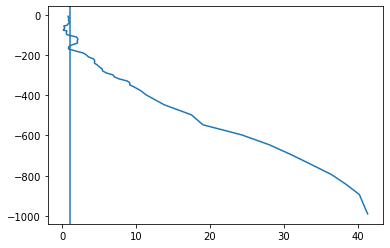

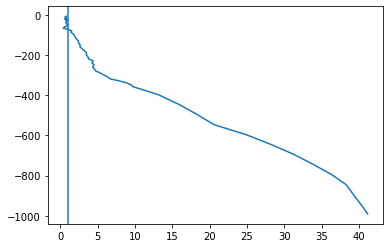

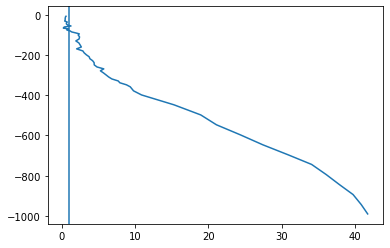

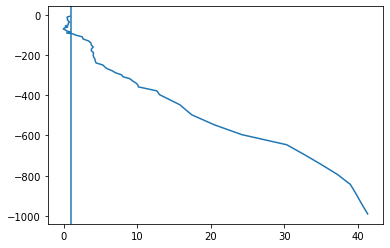

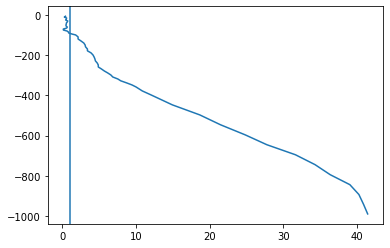

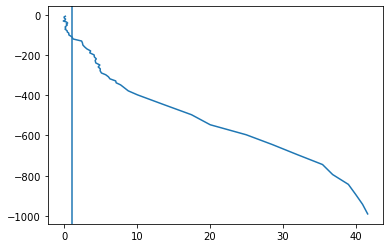

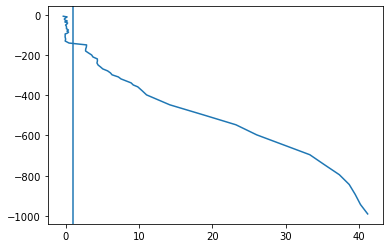

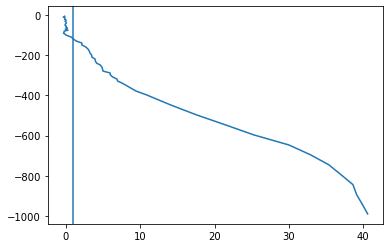

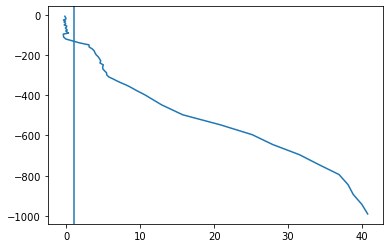

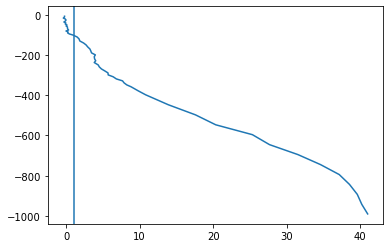

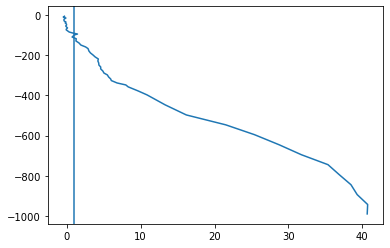

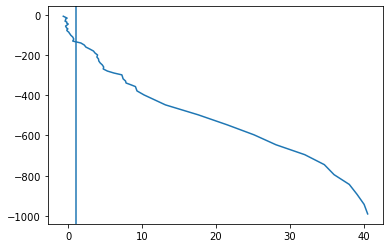

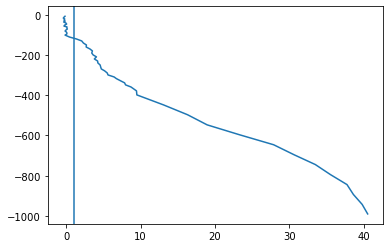

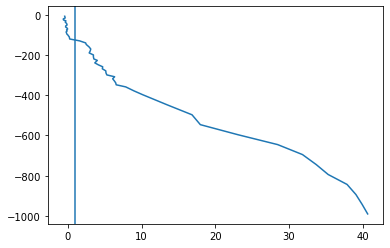

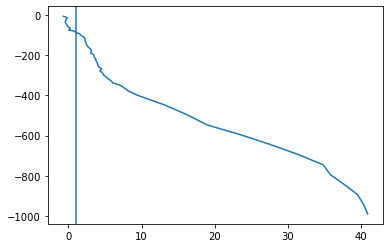

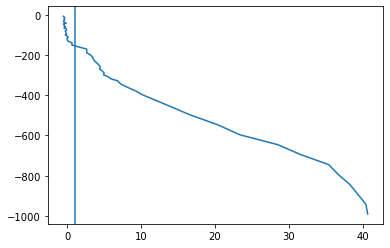

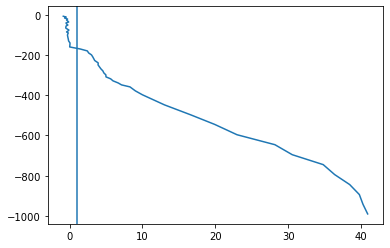

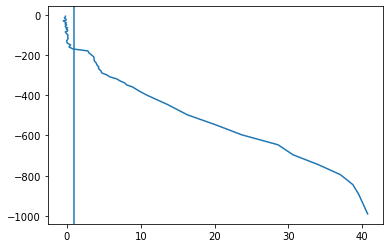

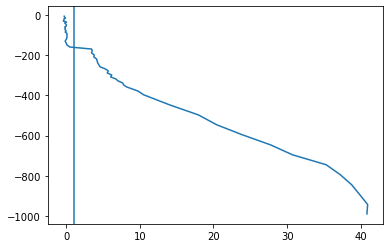

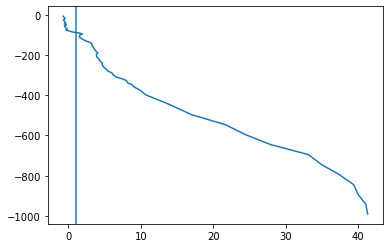

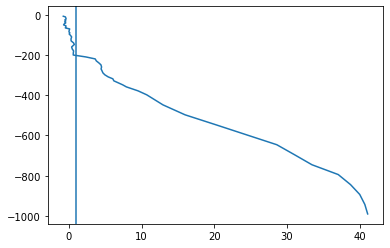

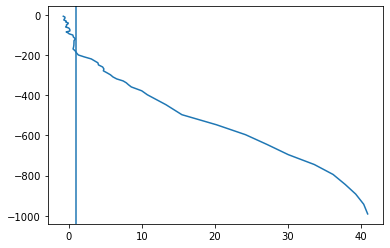

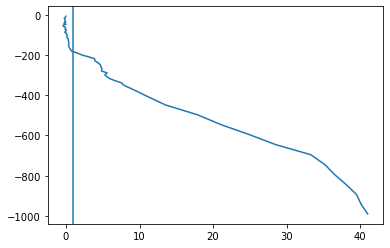

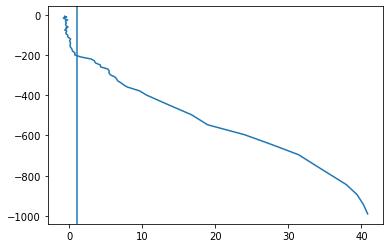

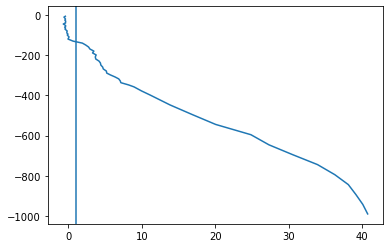

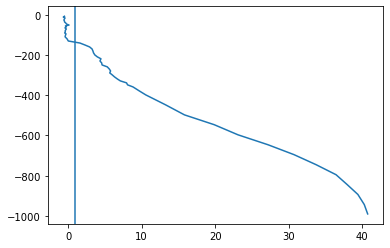

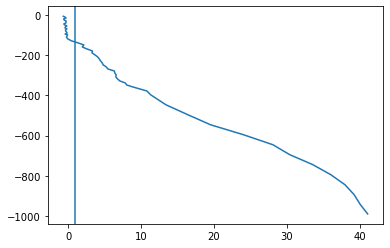

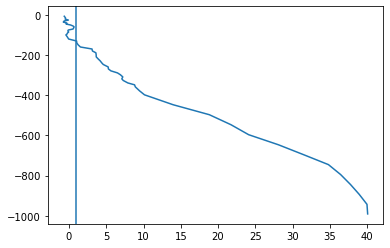

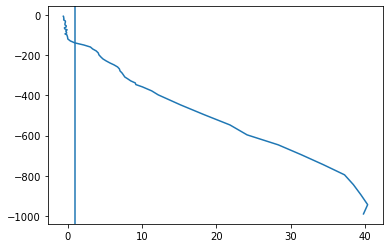

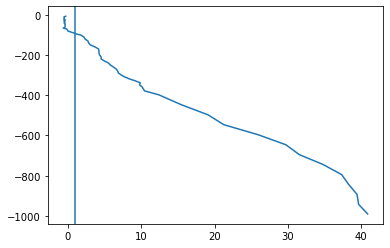

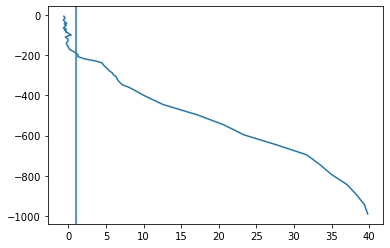

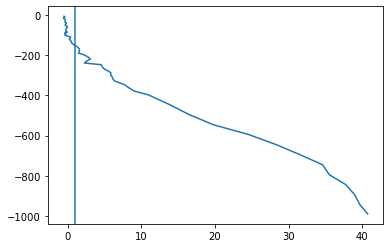

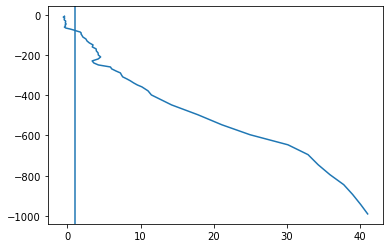

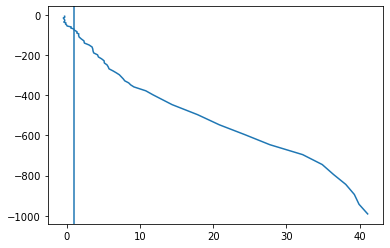

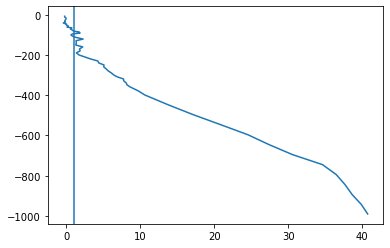

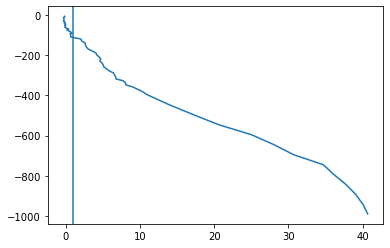

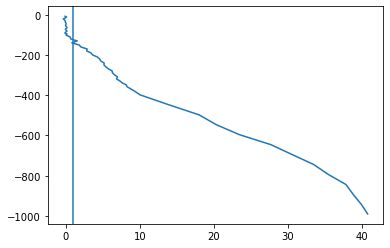

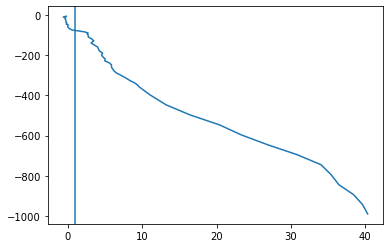

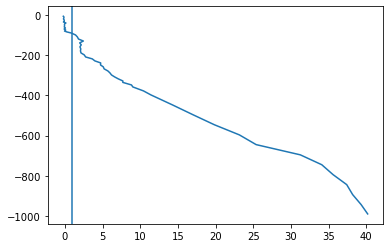

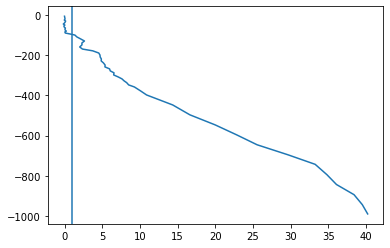

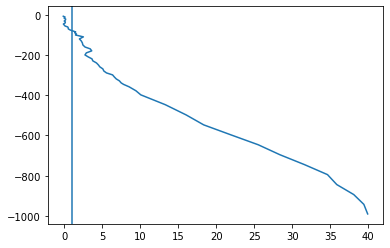

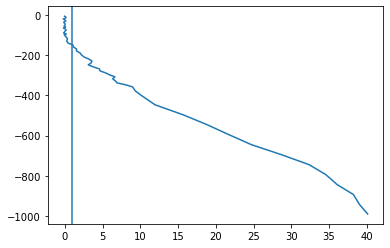

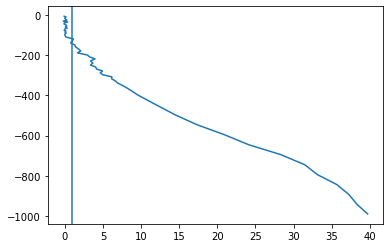

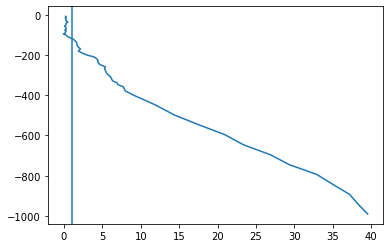

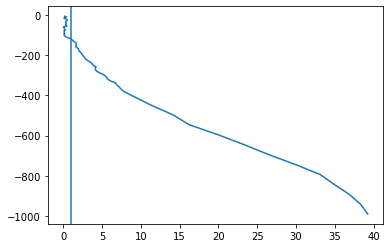

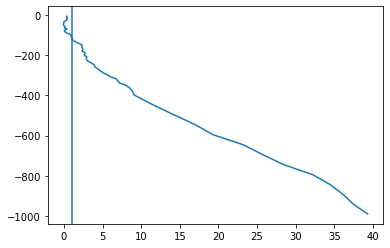

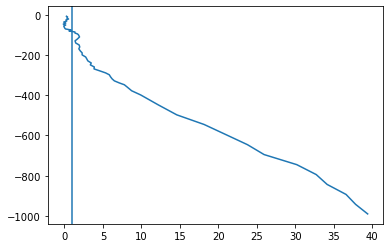

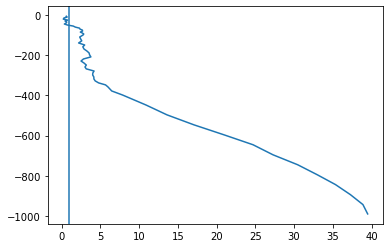

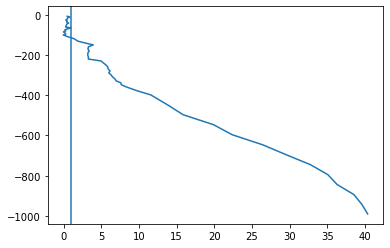

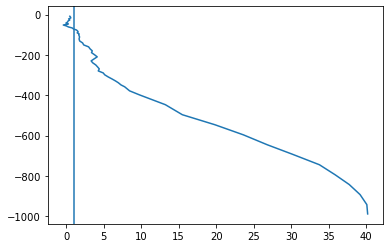

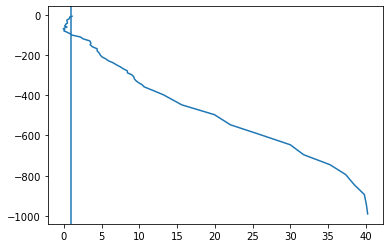

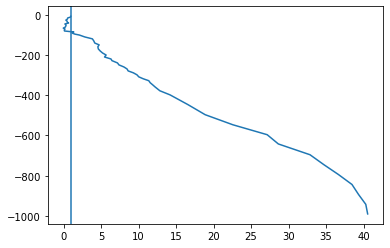

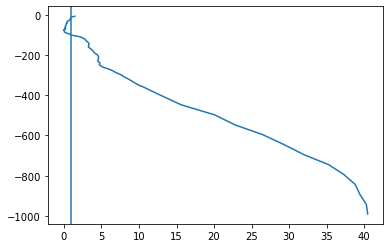

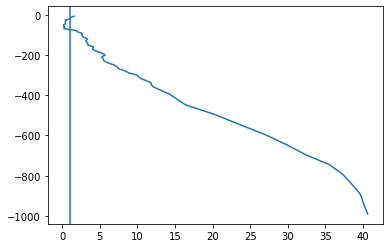

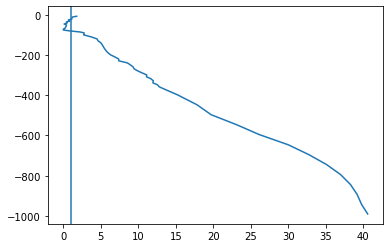

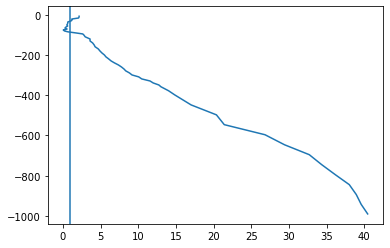

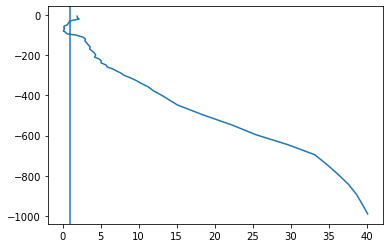

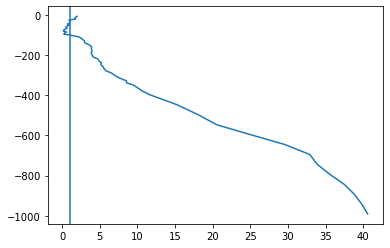

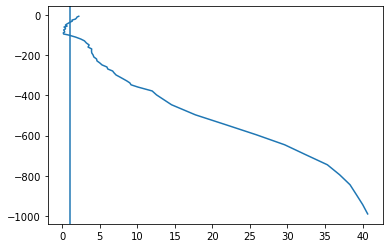

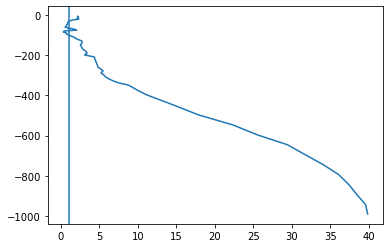

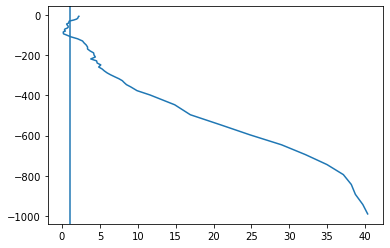

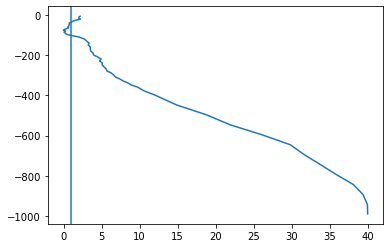

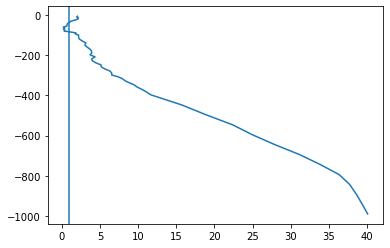

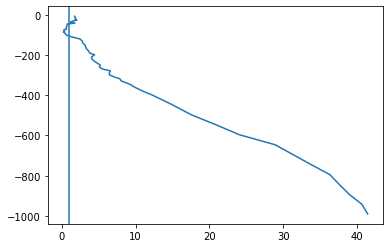

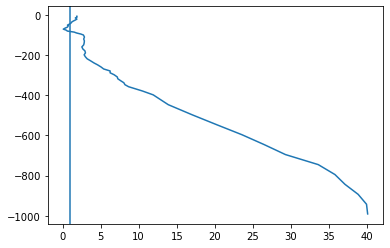

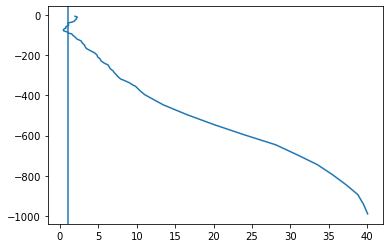

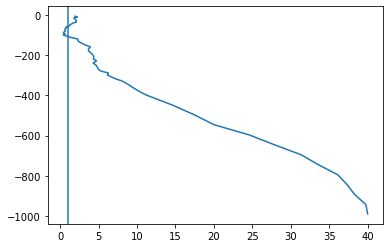

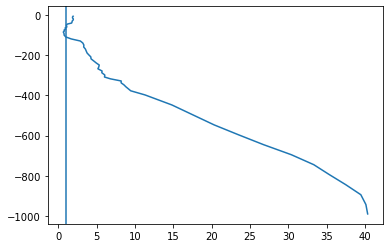

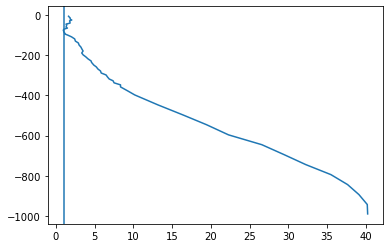

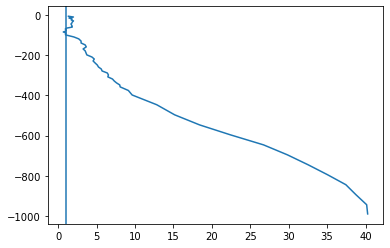

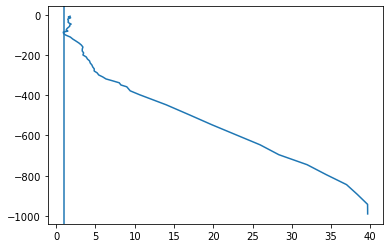

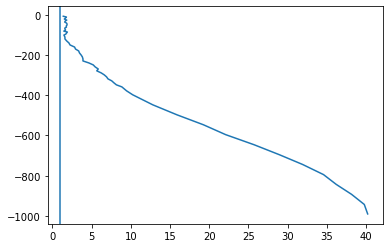

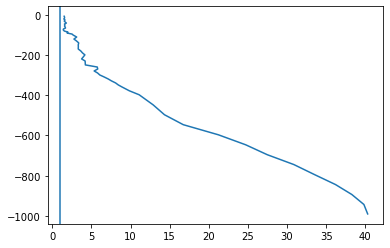

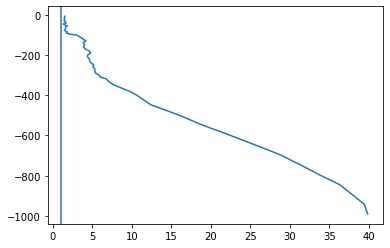

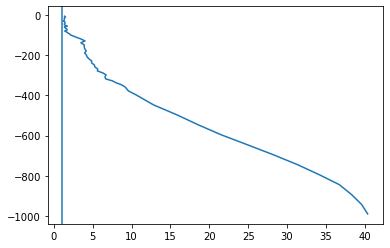

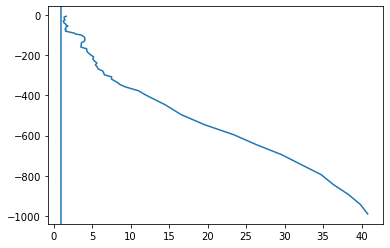

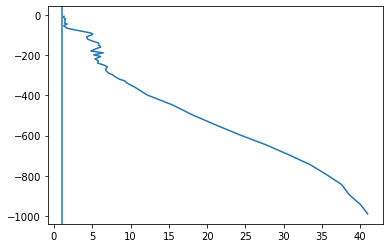

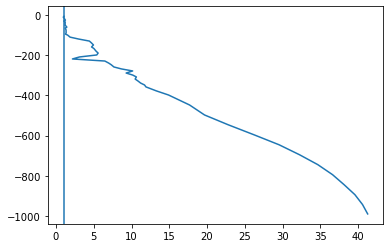

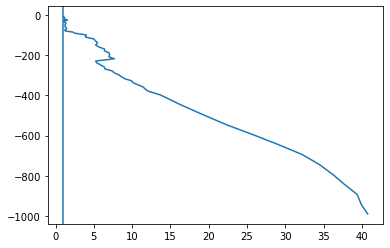

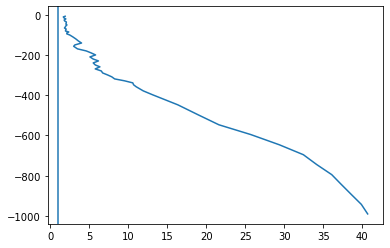

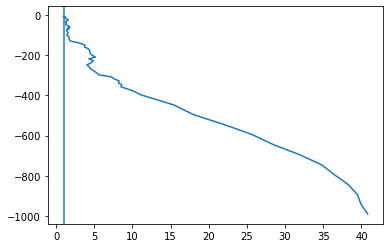

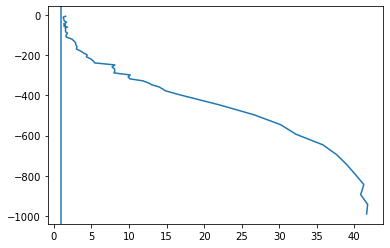

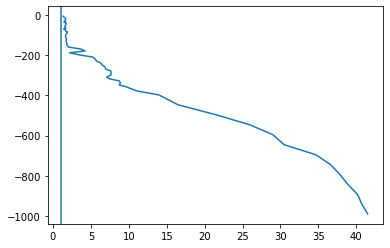

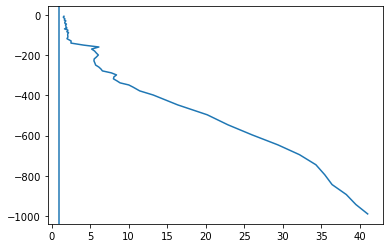

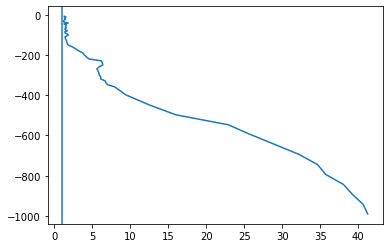

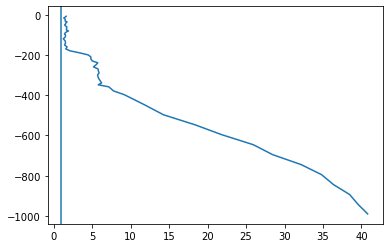

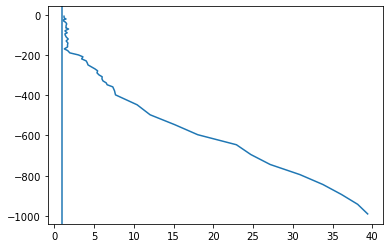

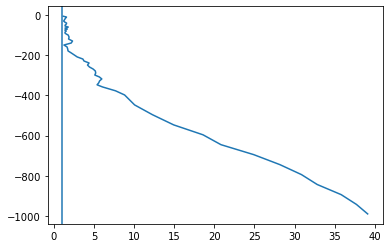

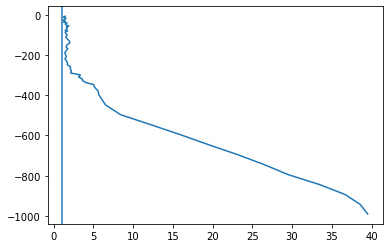

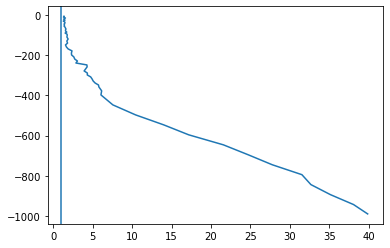

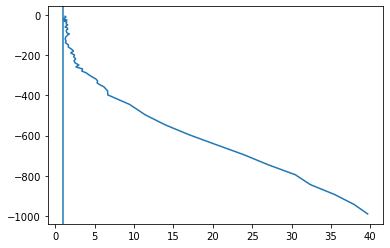

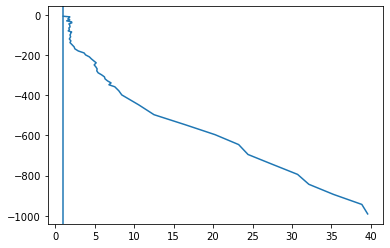

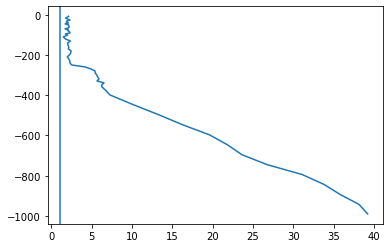

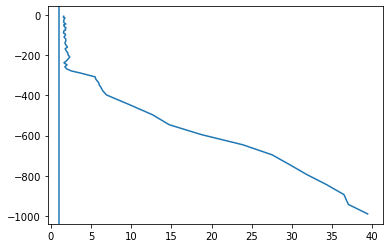

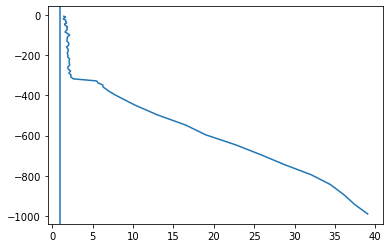

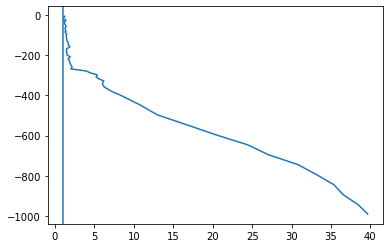

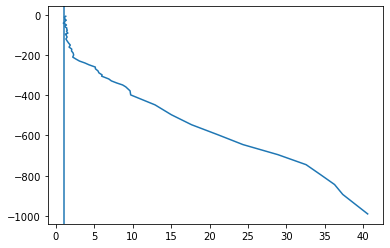

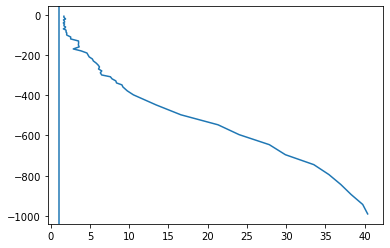

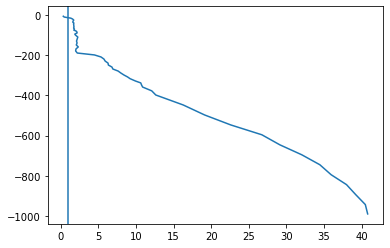

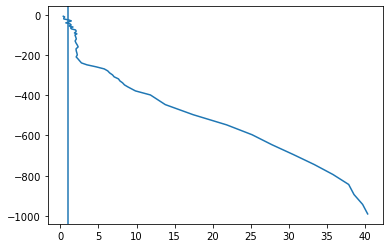

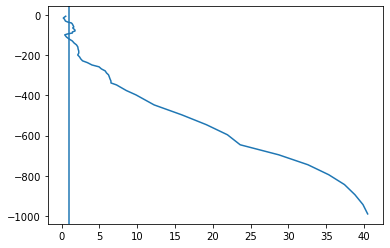

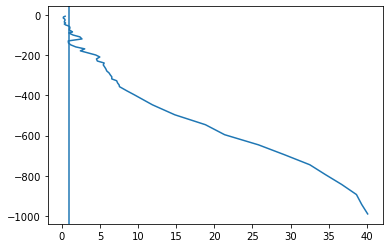

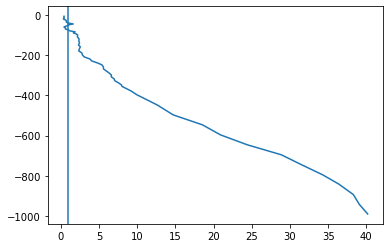

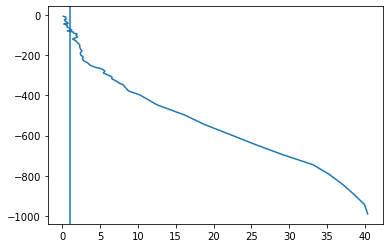

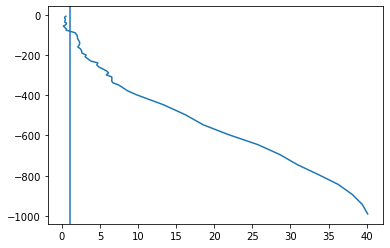

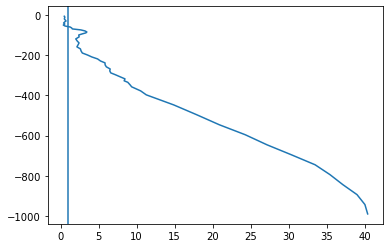

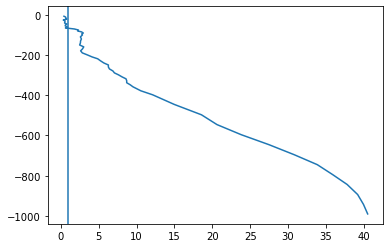

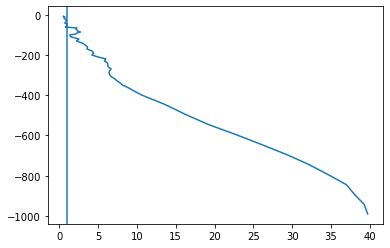

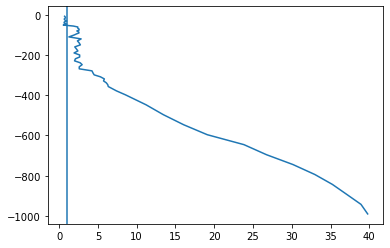

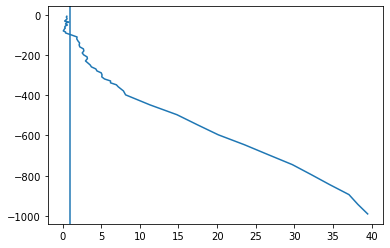

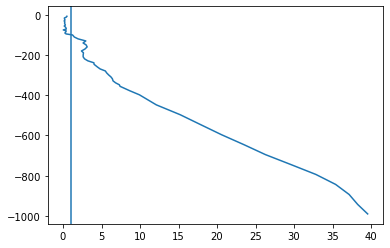

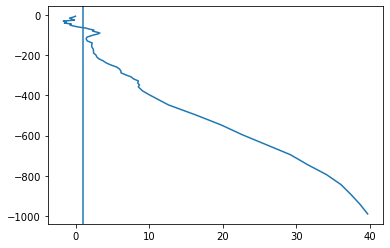

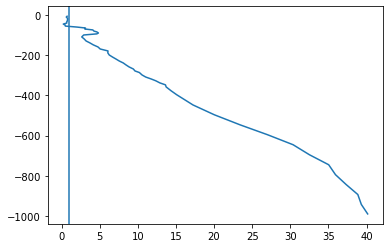

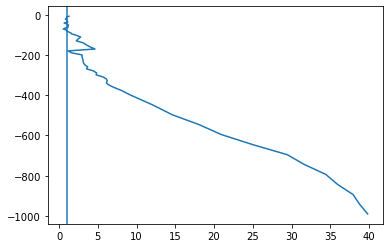

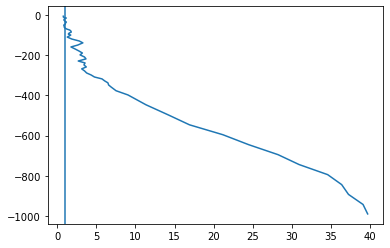

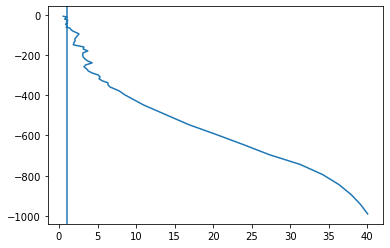

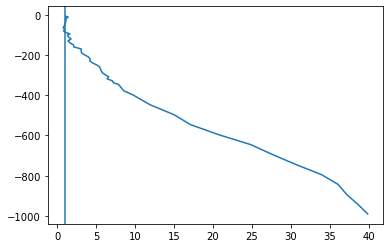

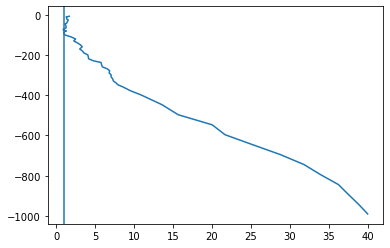

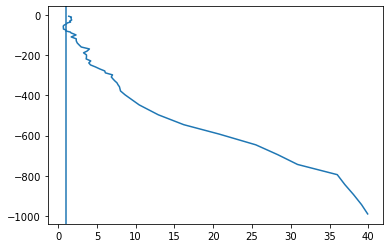

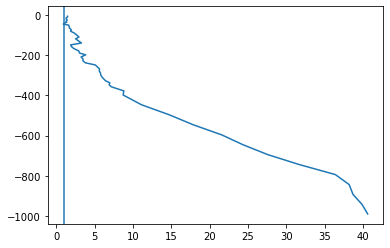

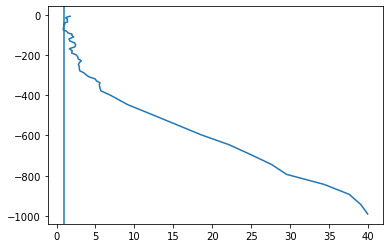

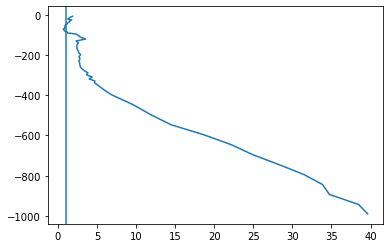

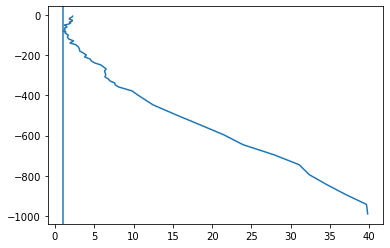

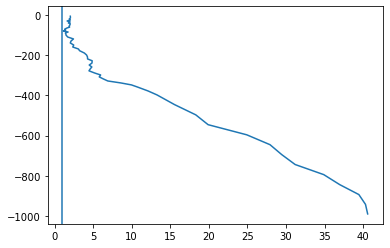

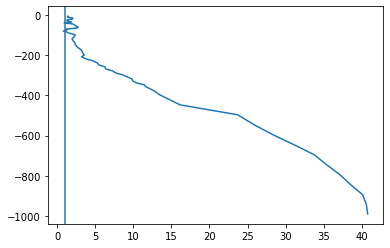

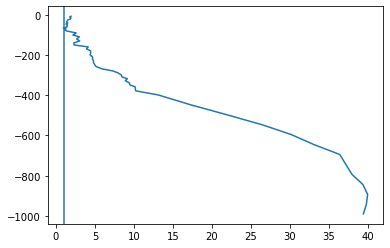

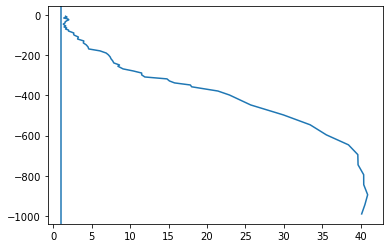

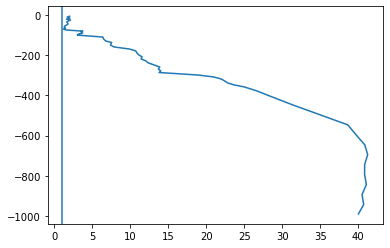

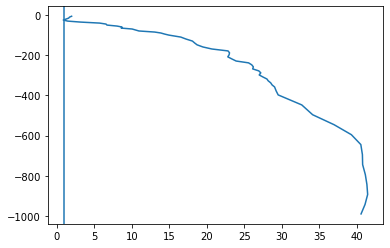

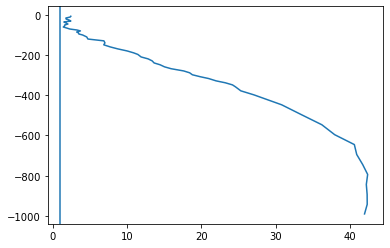

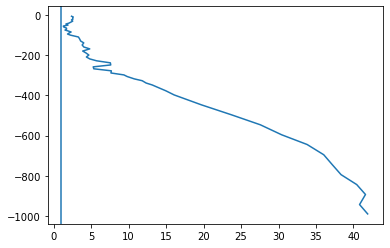

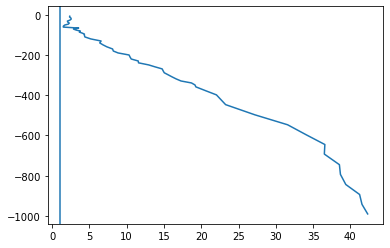

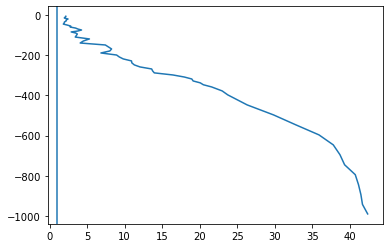

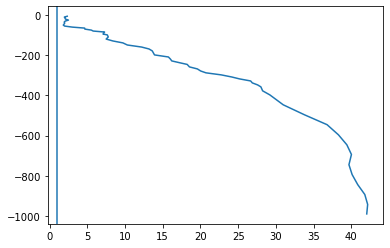

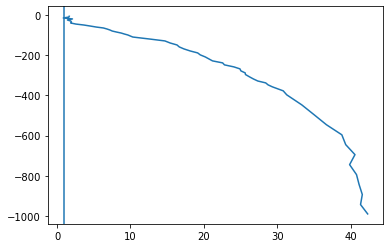

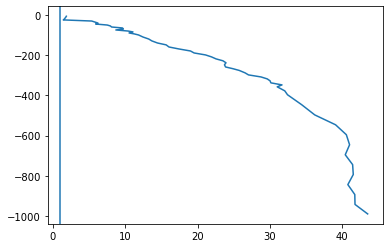

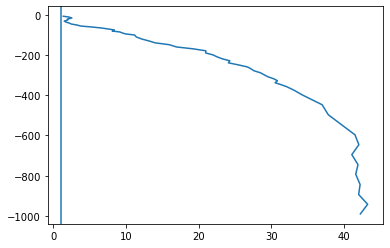

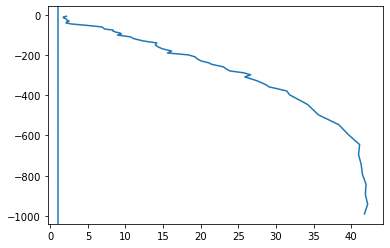

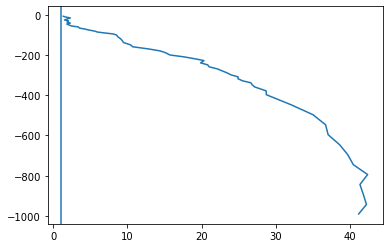

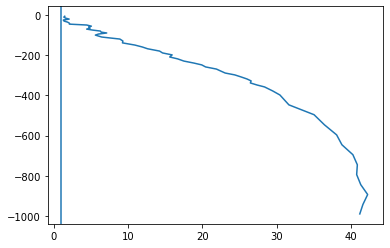

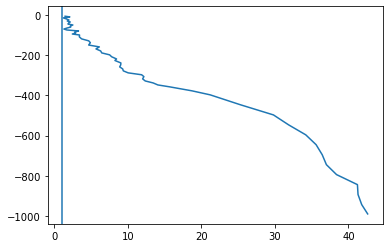

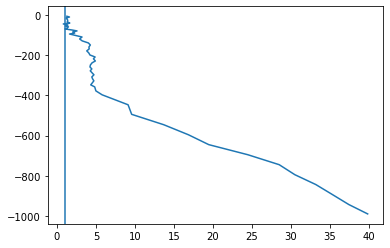

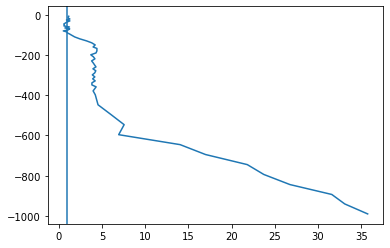

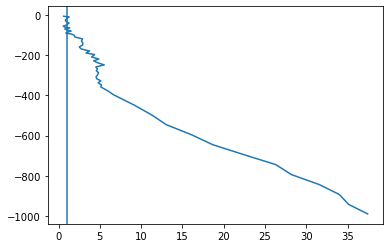

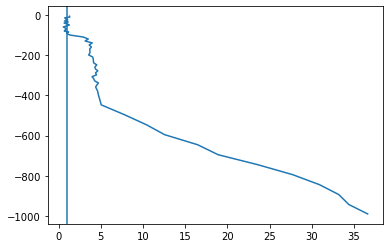

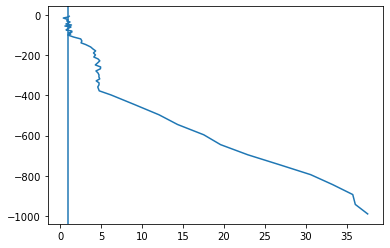

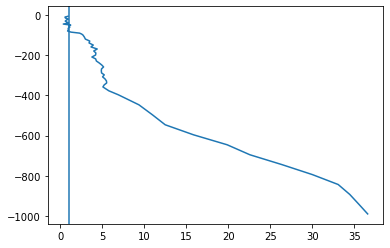

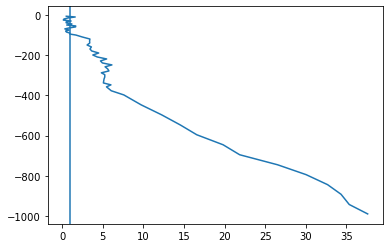

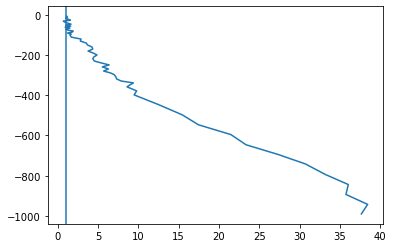

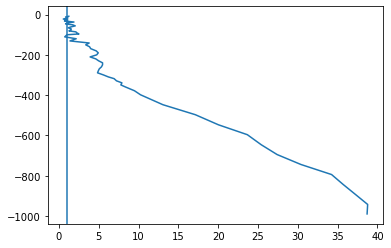

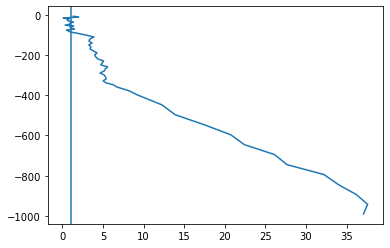

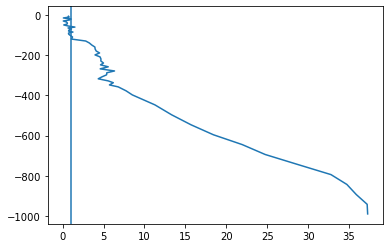

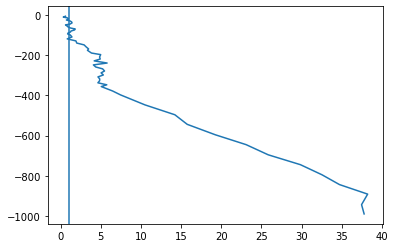

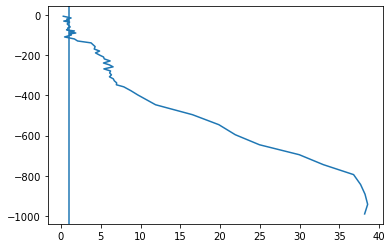

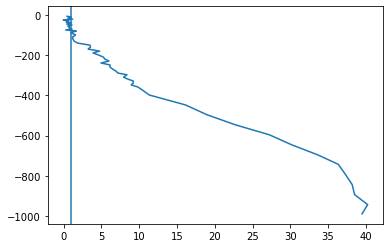

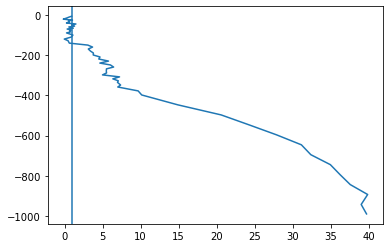

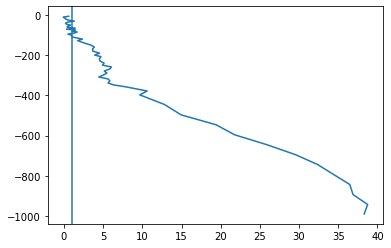

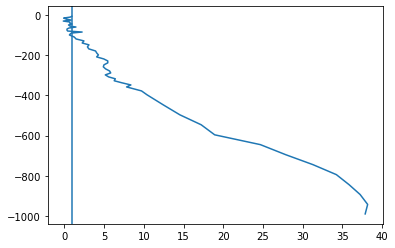

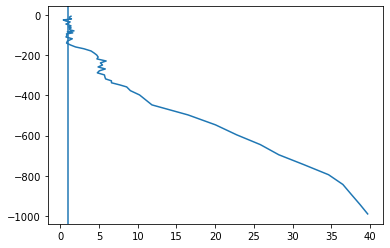

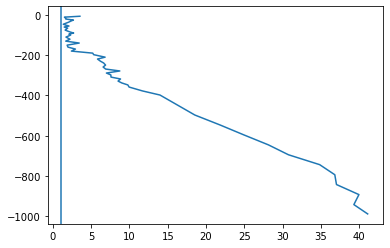

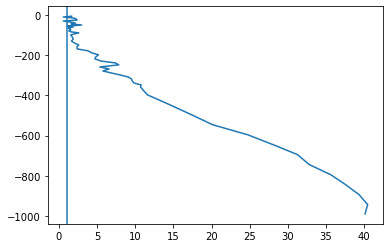

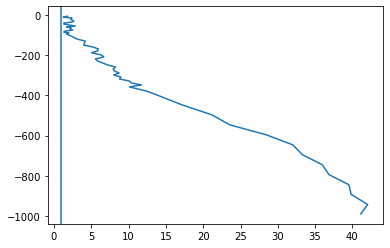

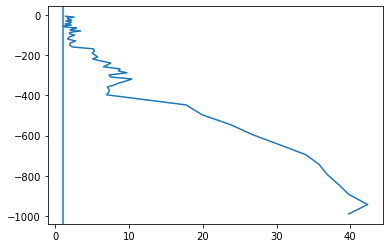

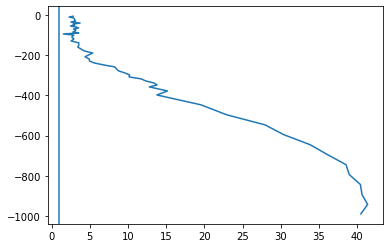

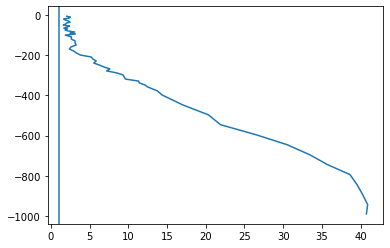

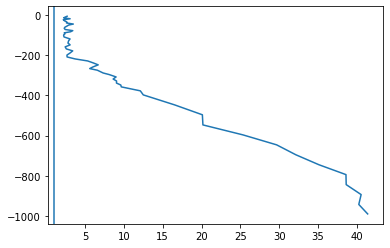

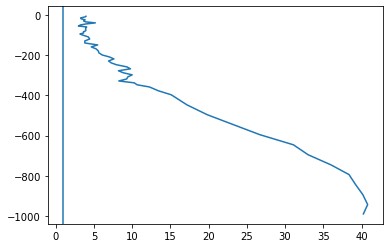

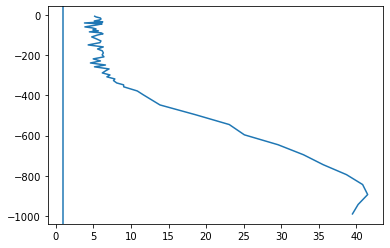

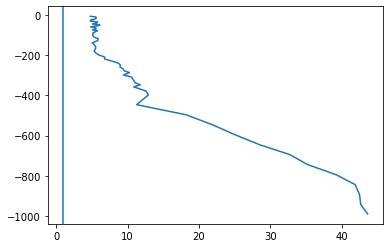

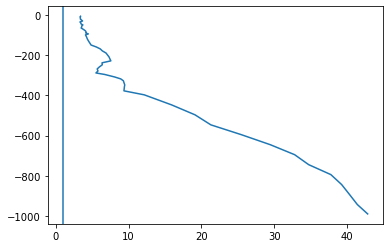

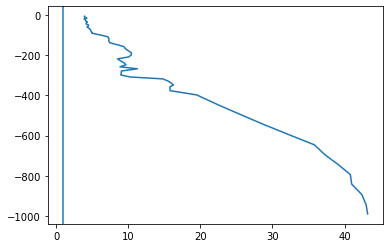

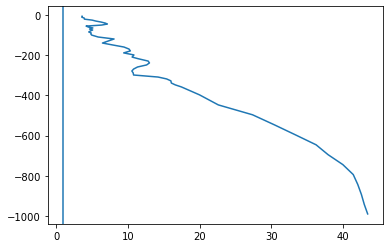

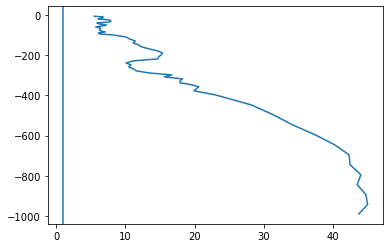

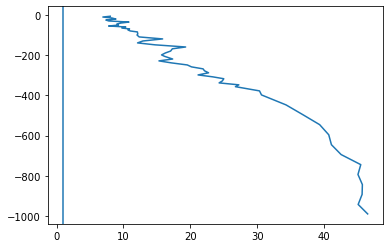

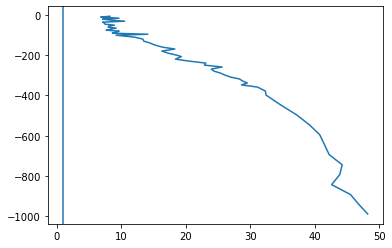

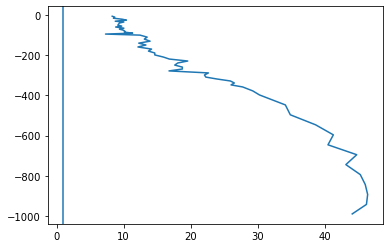

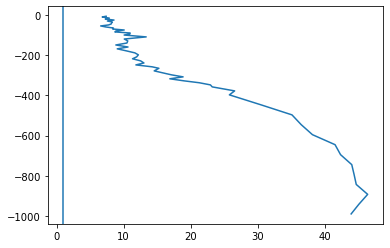

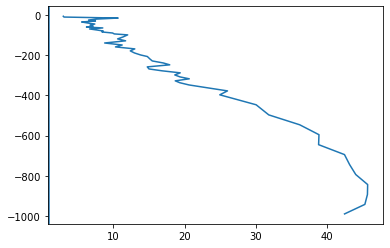

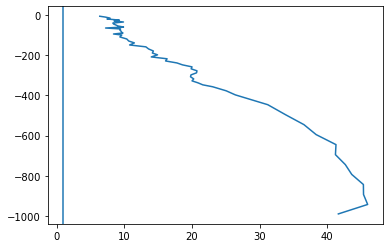

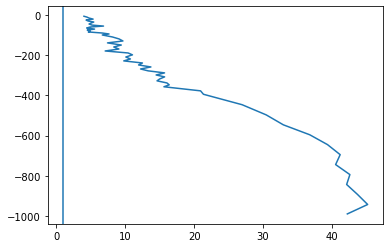

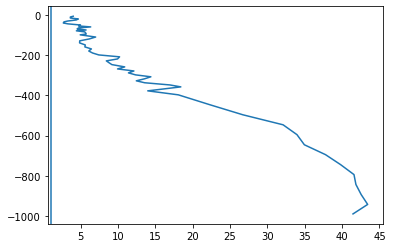

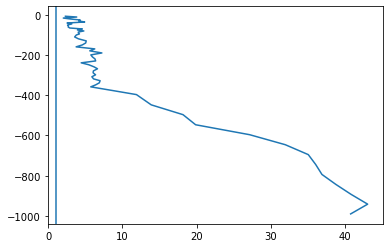

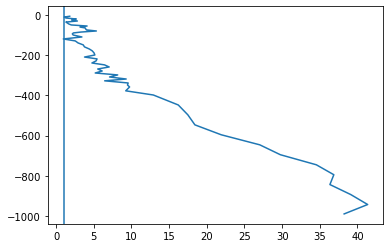

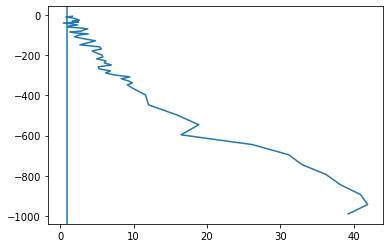

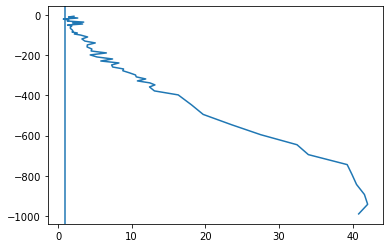

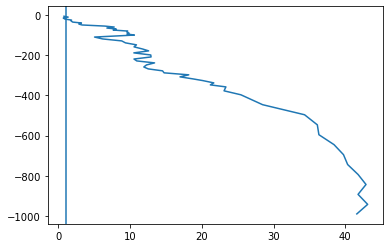

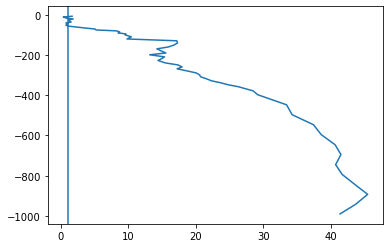

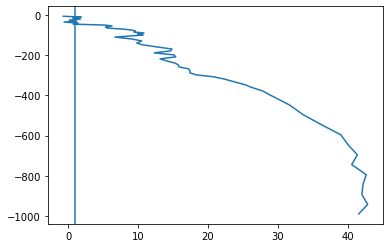

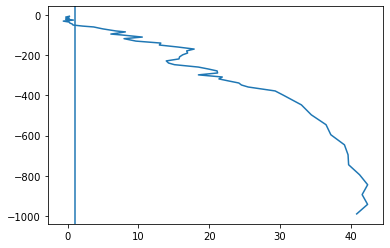

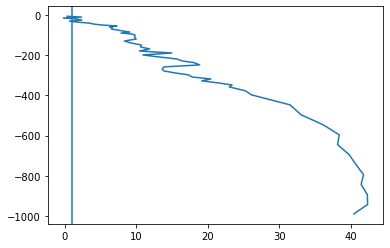

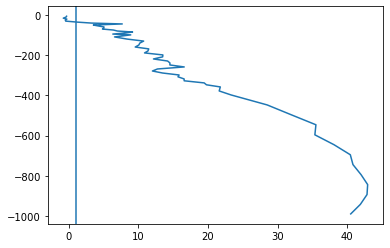

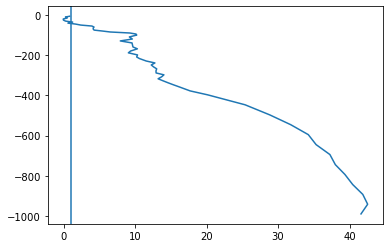

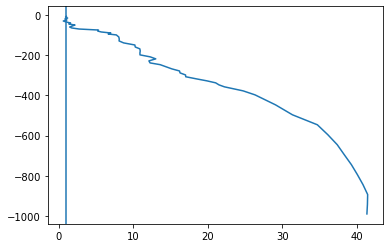

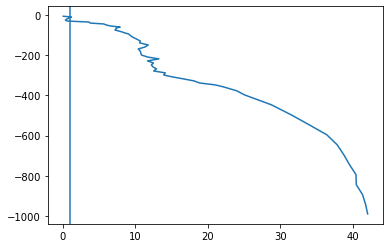

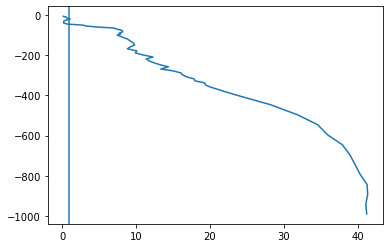

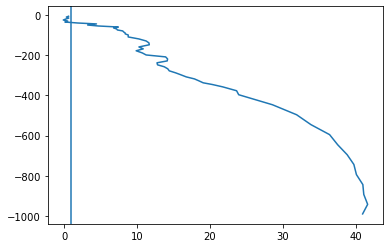

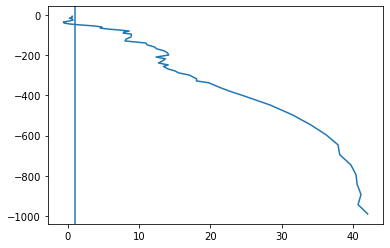

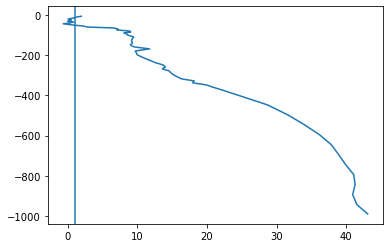

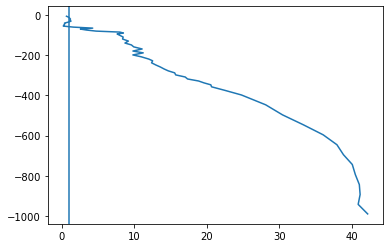

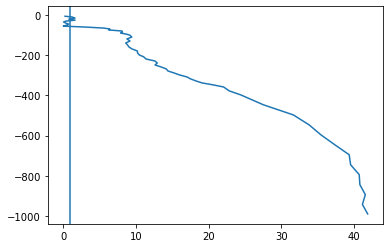

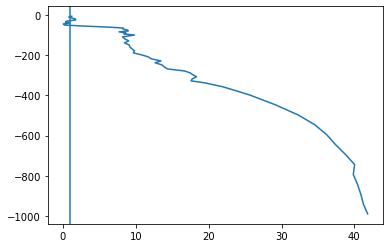

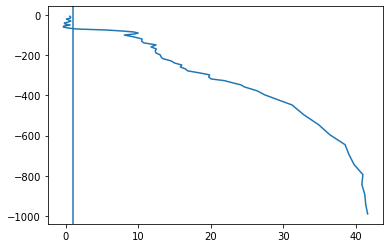

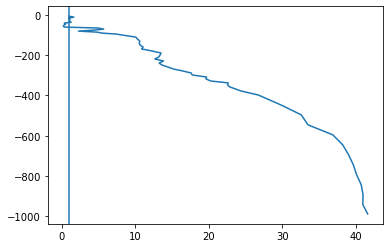

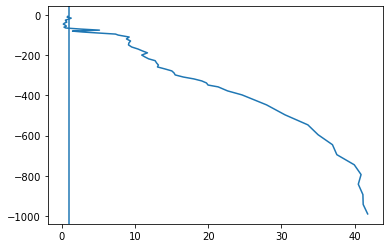

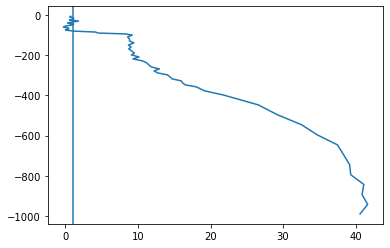

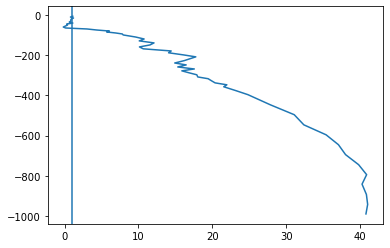

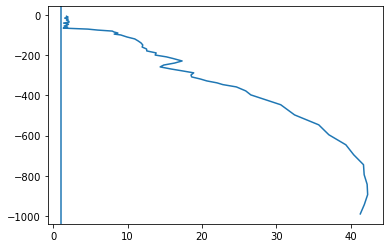

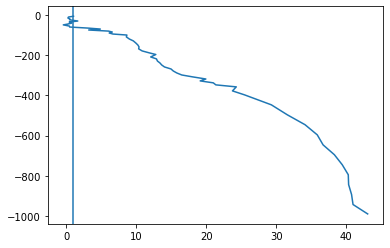

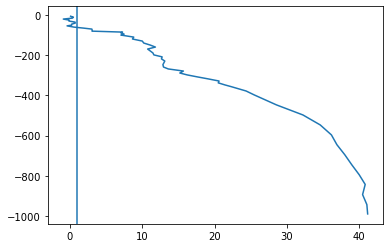

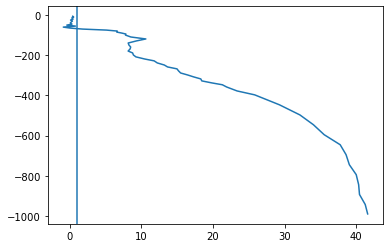

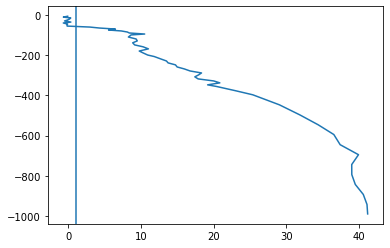

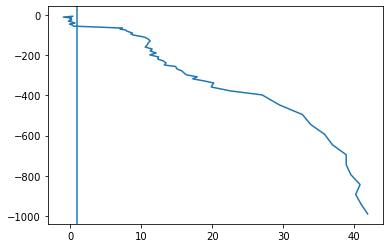

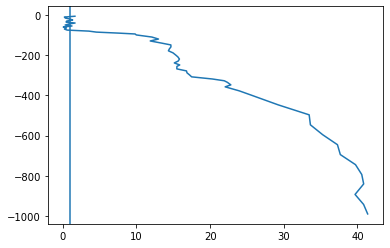

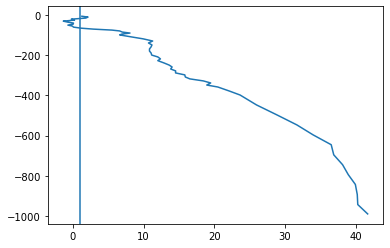

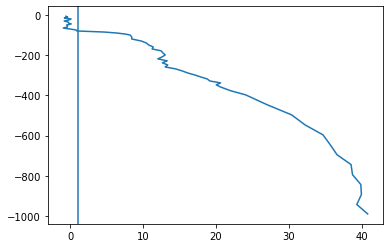

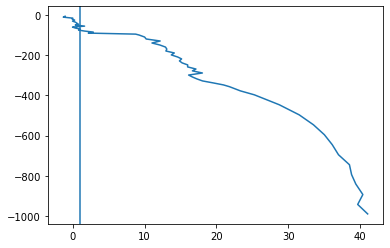

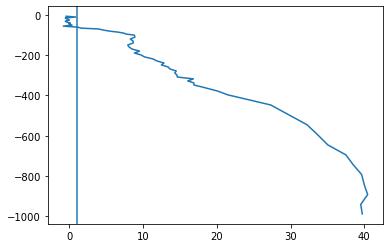

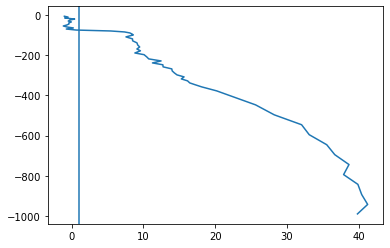

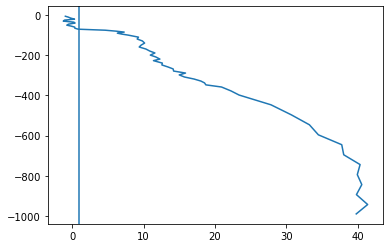

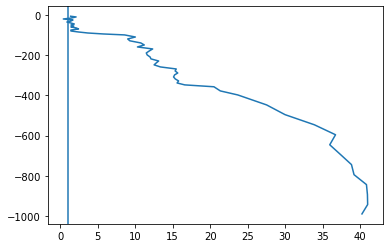

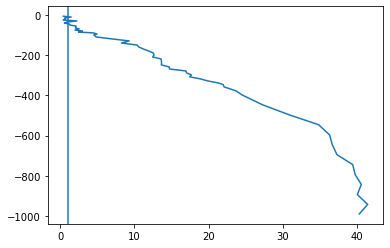

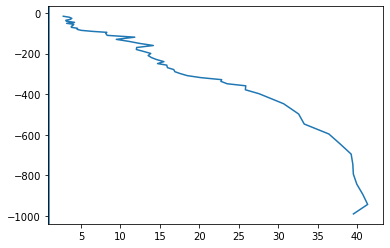

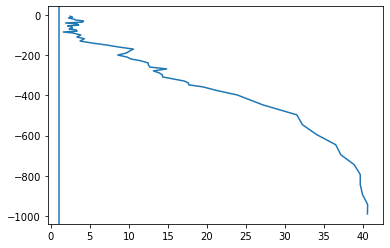

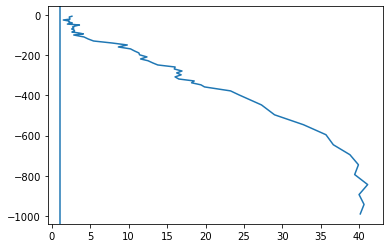

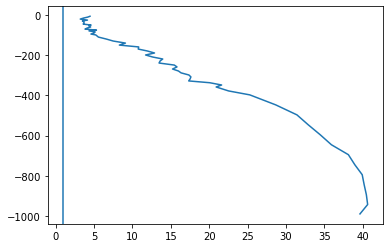

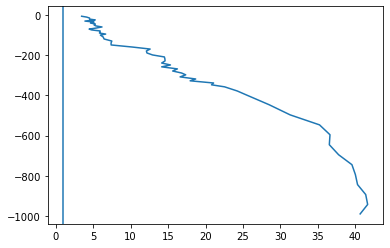

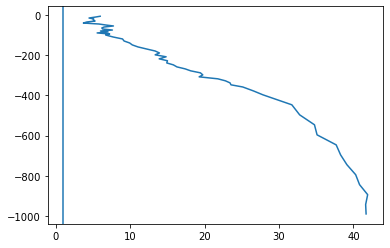

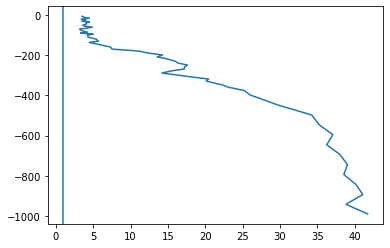

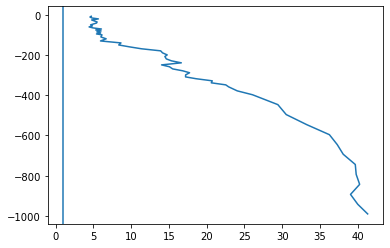

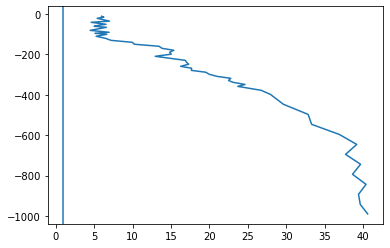

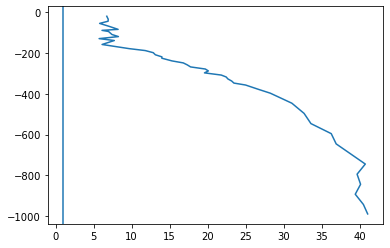

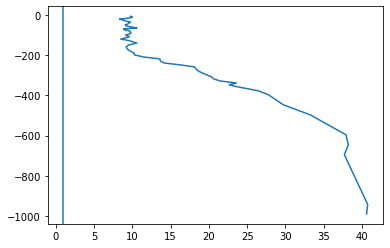

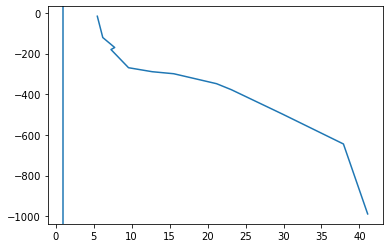

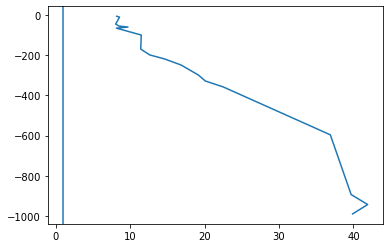

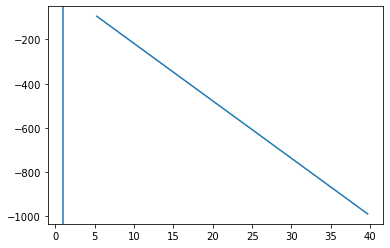

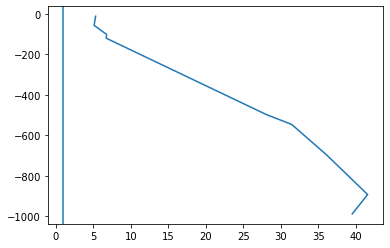

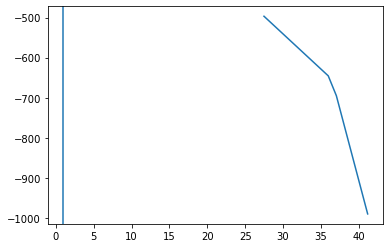

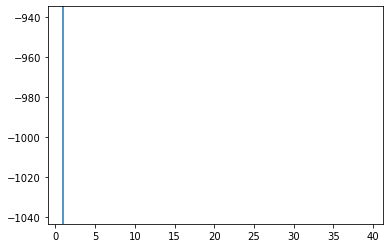

../../kuroshio_productivity/data/argo/7546KUROSHIOQC.txt 283  casts, DONE


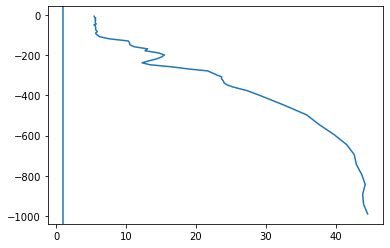

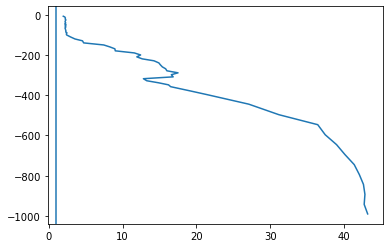

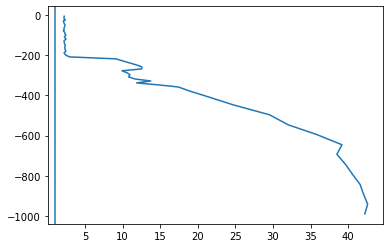

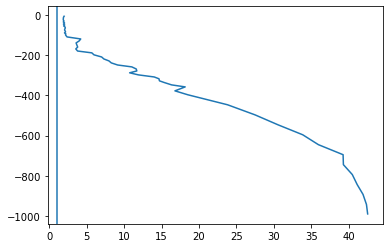

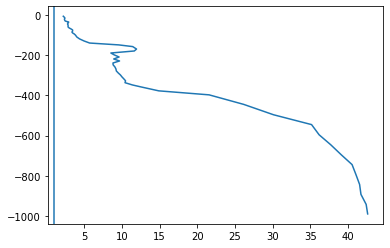

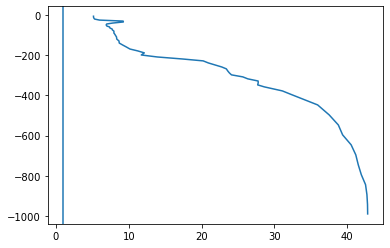

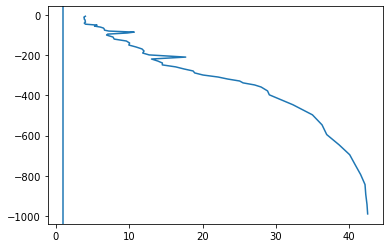

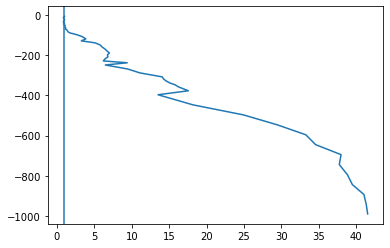

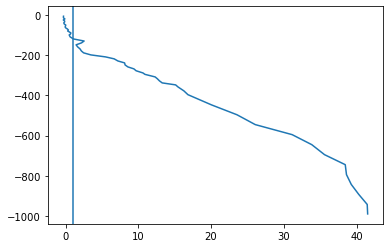

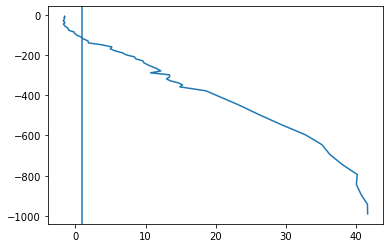

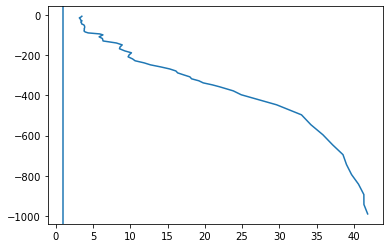

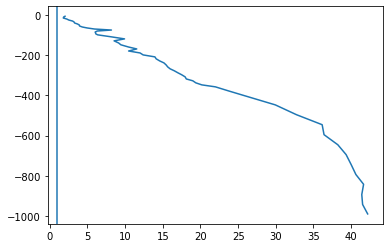

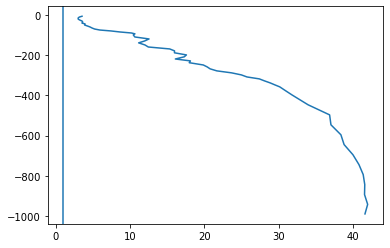

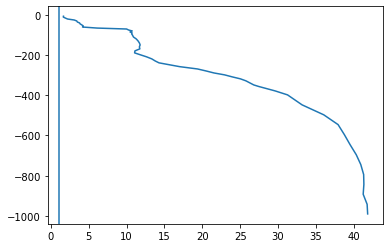

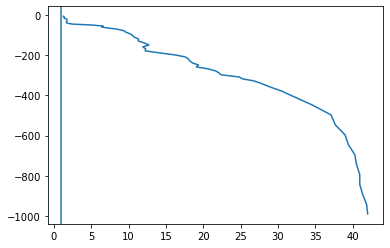

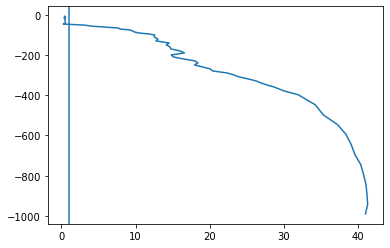

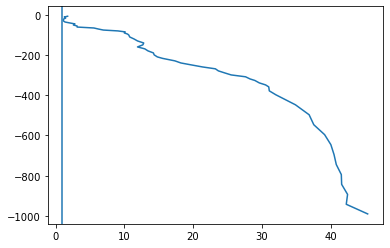

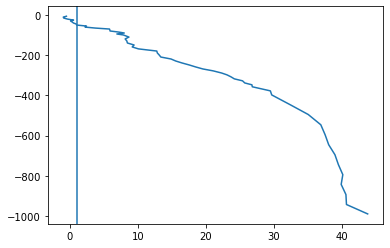

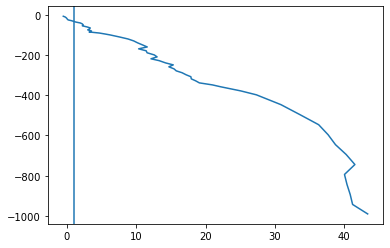

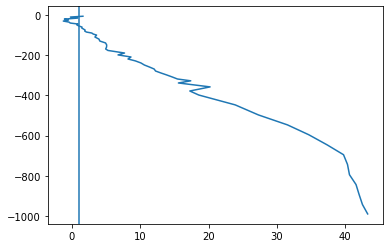

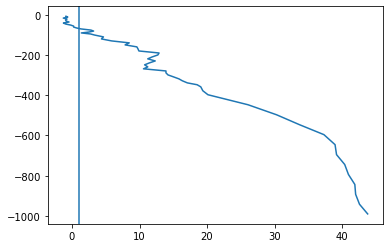

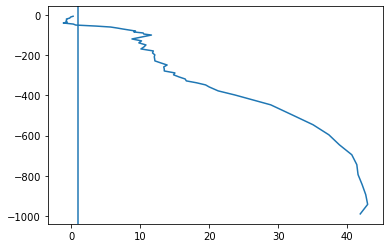

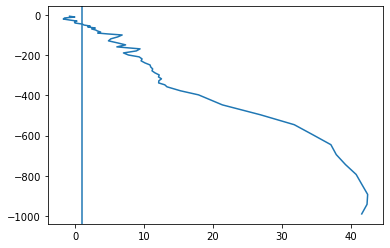

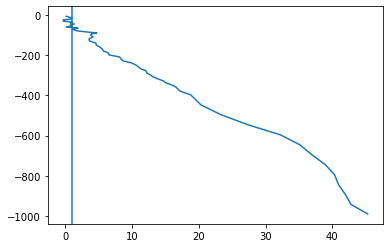

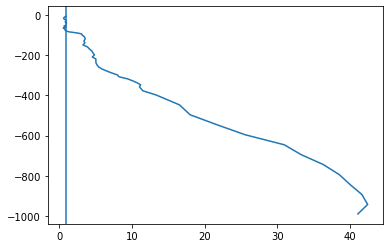

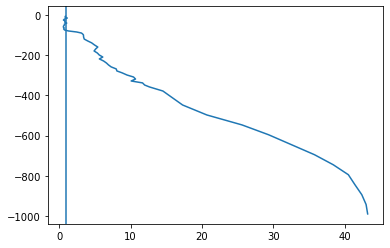

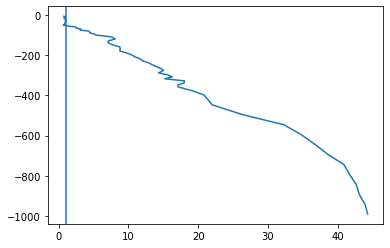

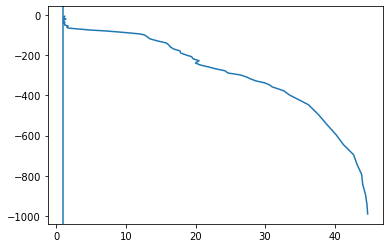

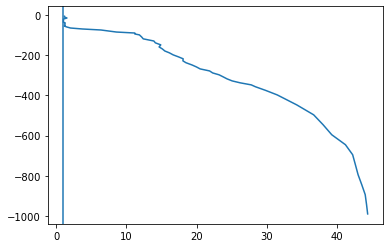

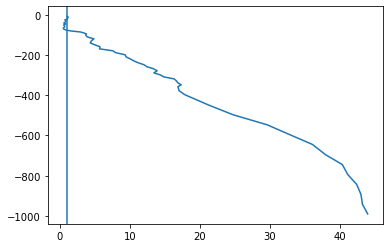

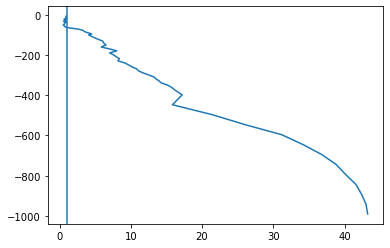

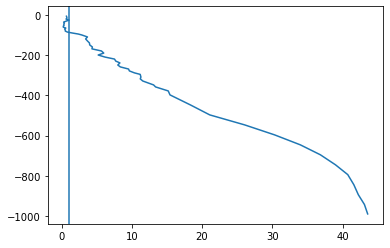

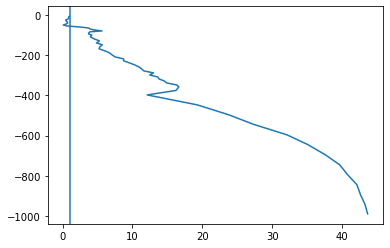

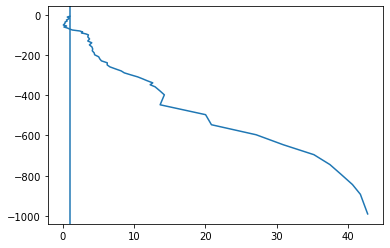

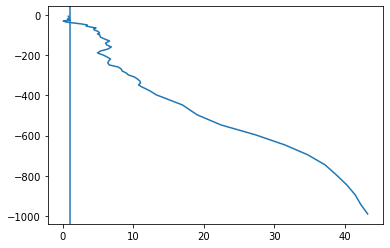

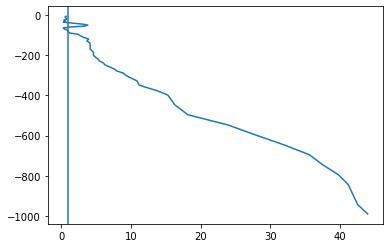

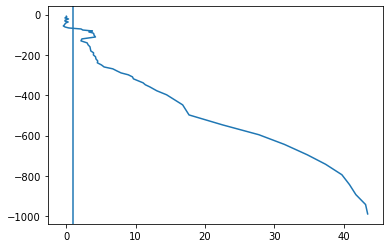

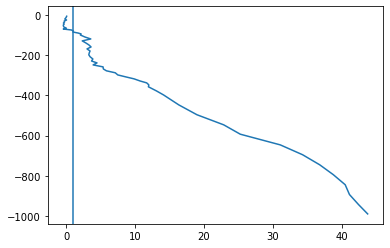

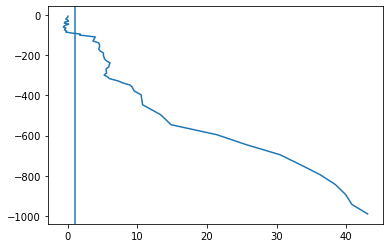

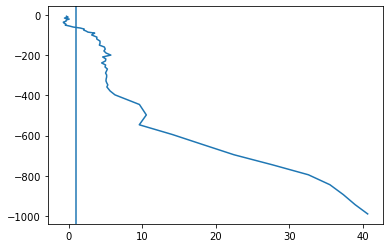

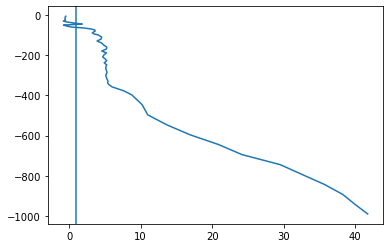

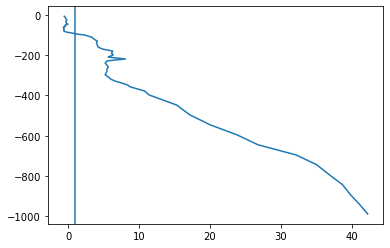

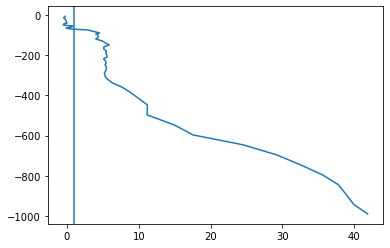

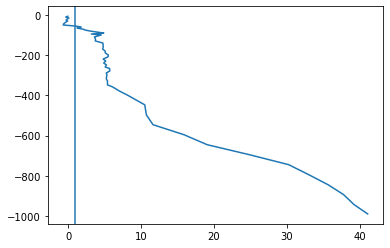

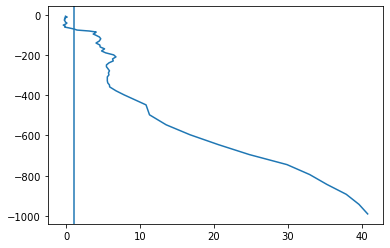

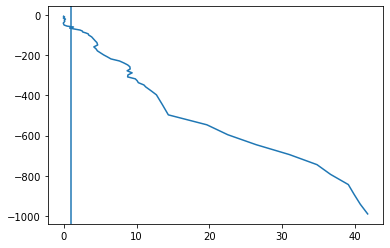

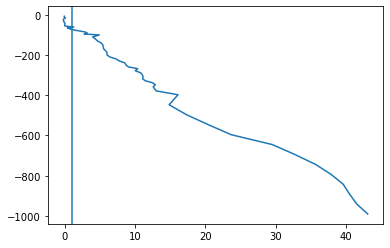

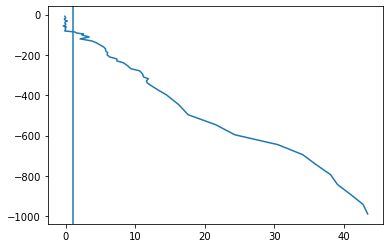

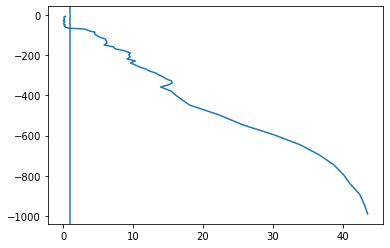

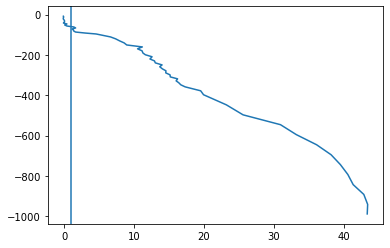

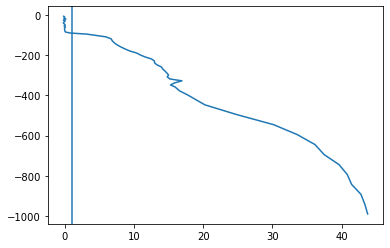

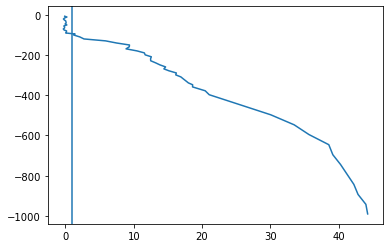

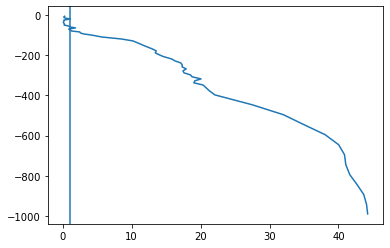

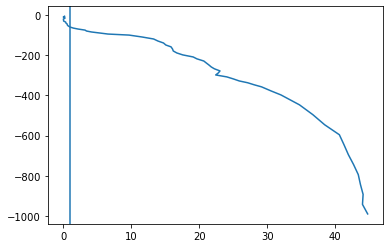

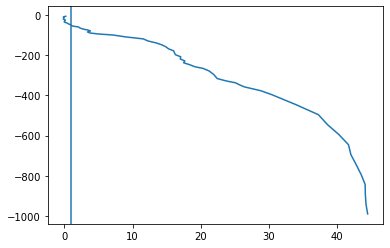

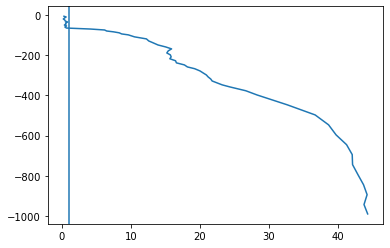

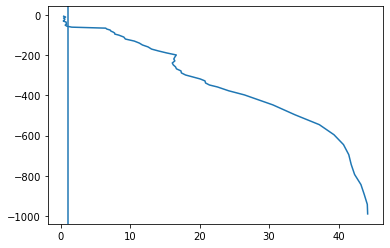

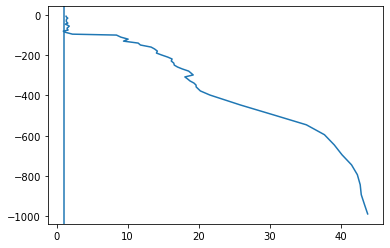

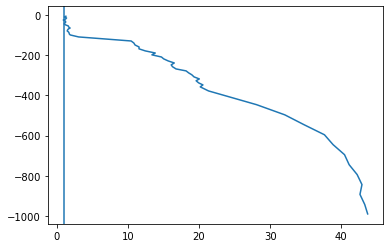

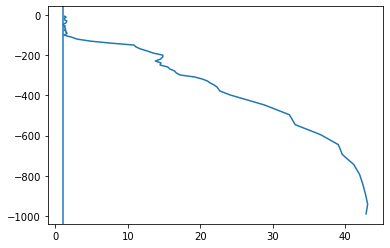

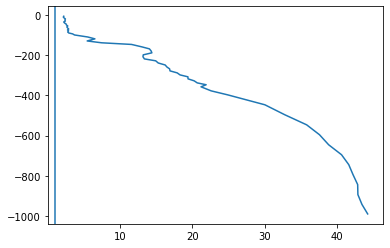

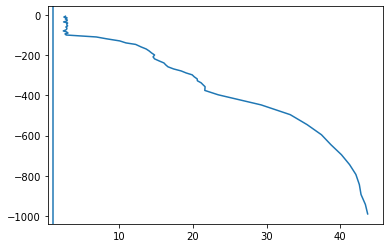

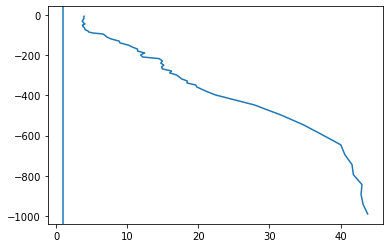

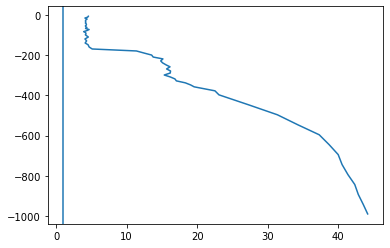

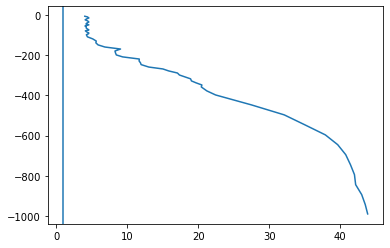

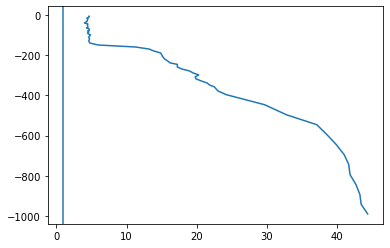

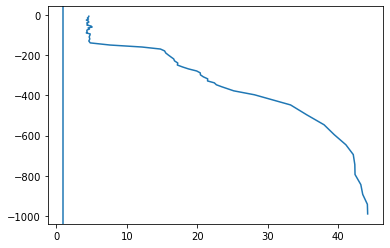

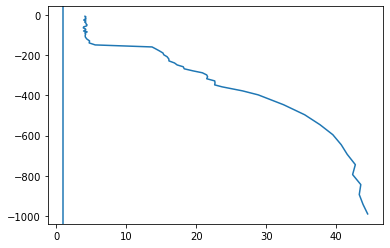

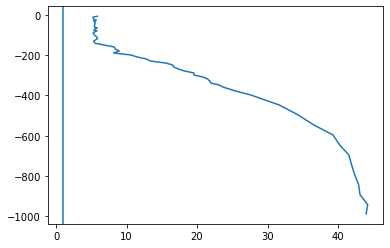

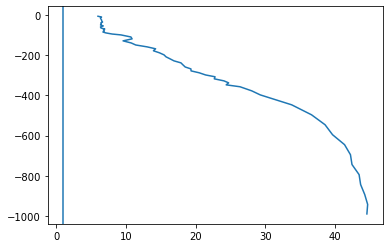

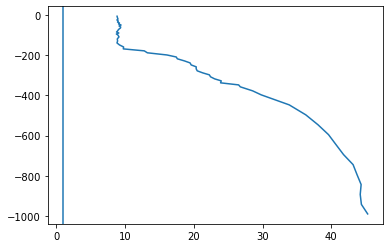

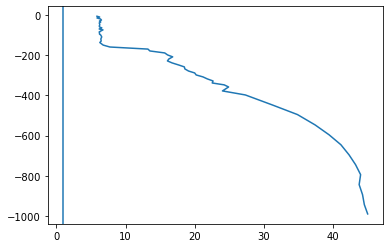

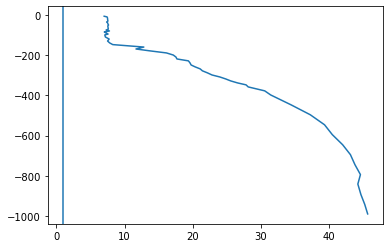

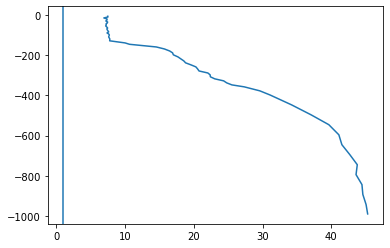

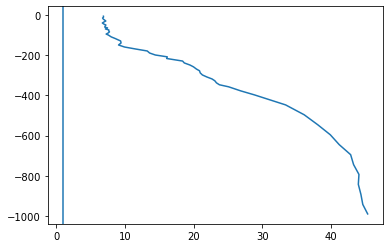

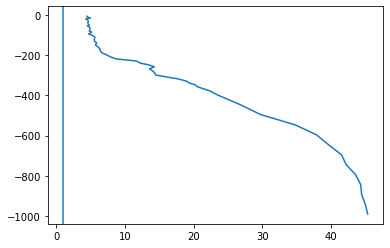

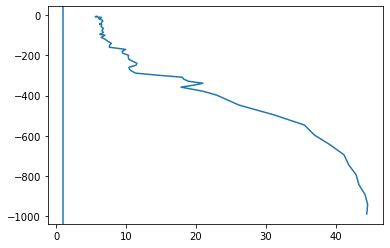

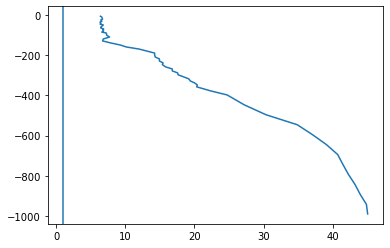

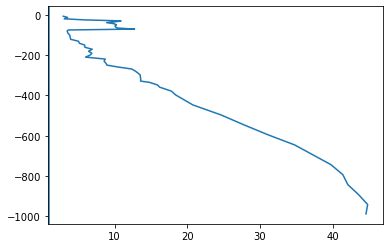

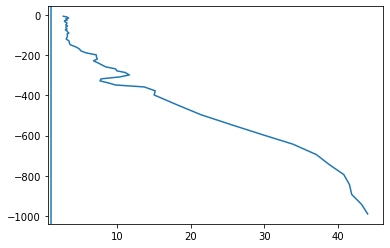

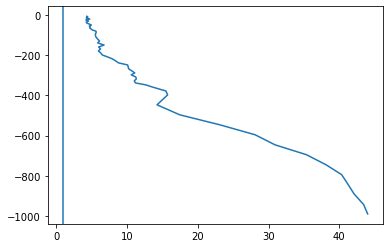

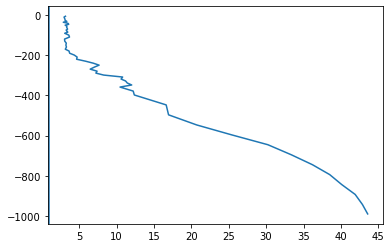

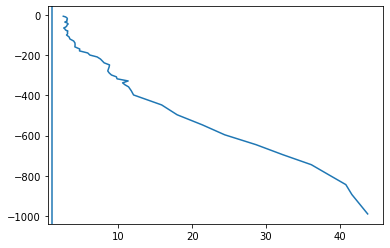

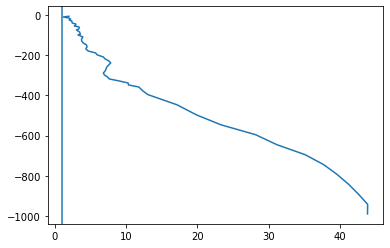

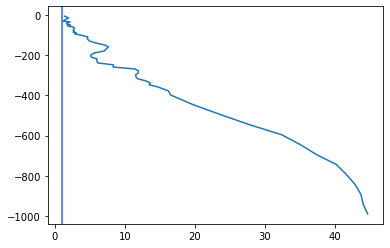

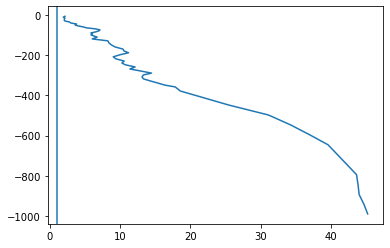

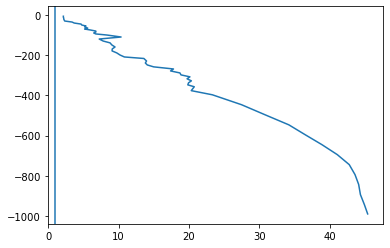

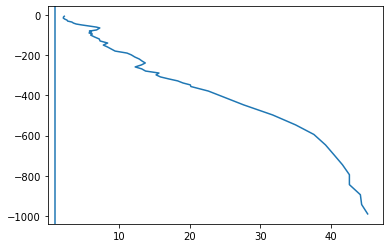

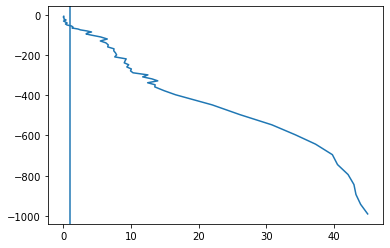

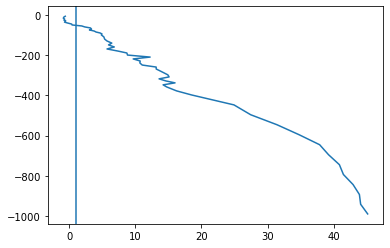

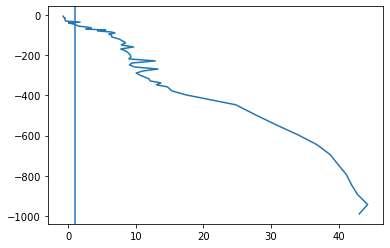

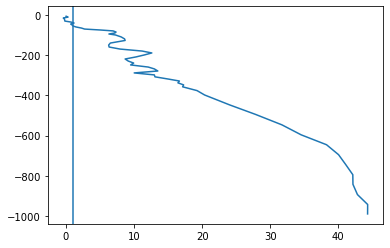

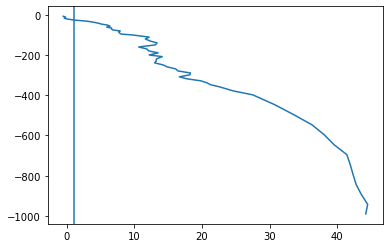

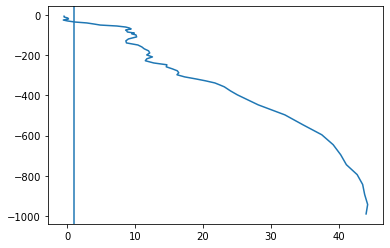

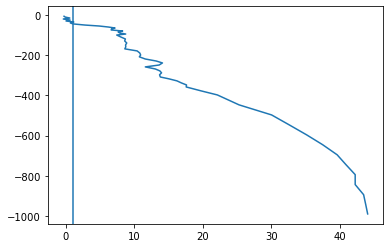

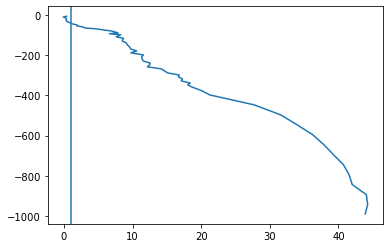

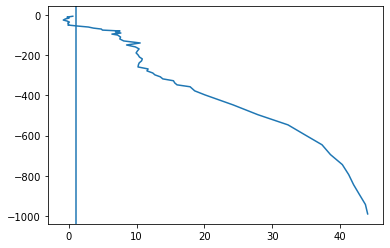

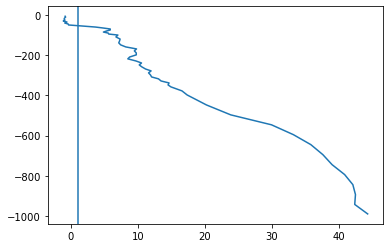

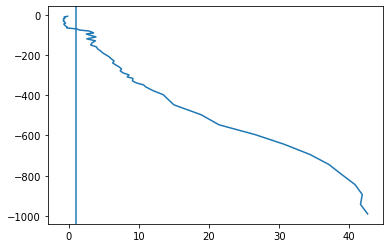

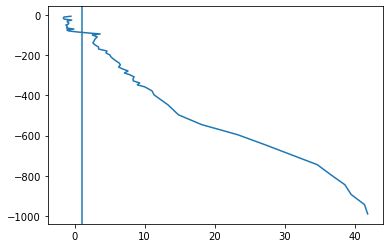

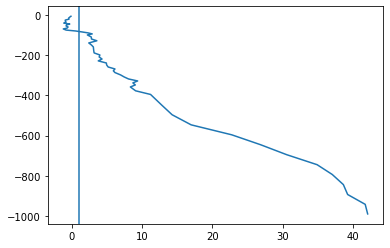

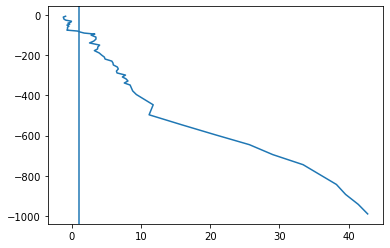

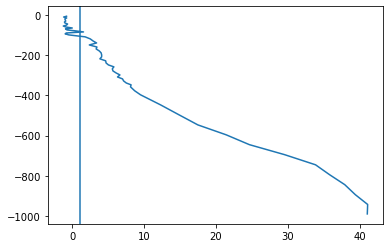

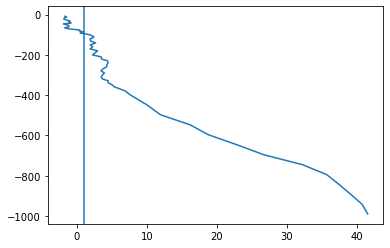

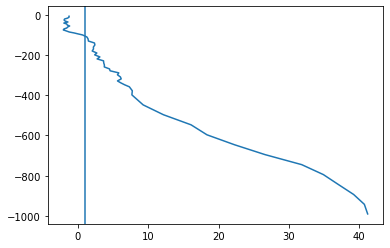

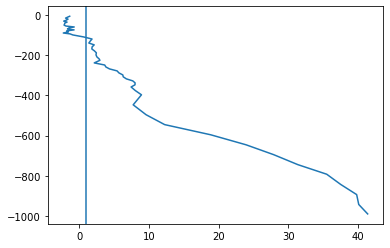

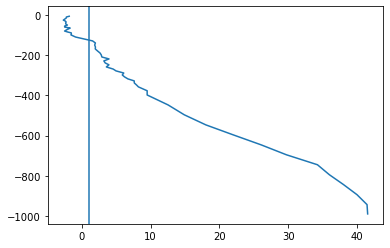

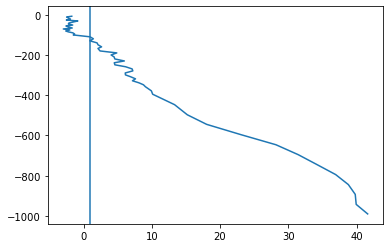

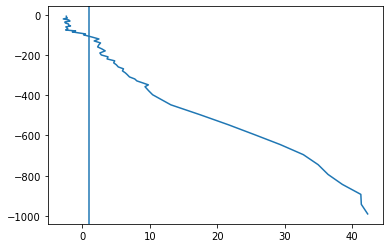

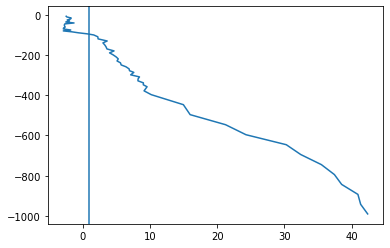

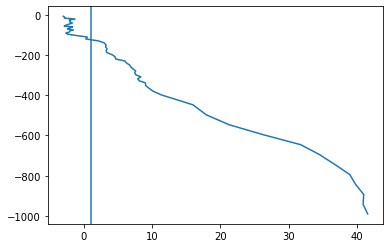

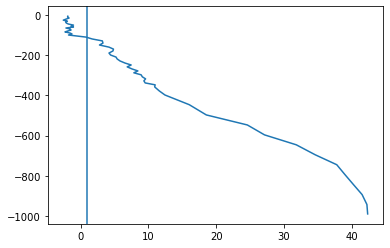

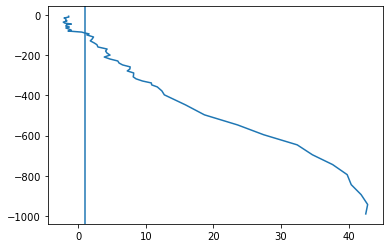

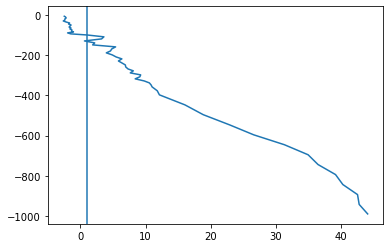

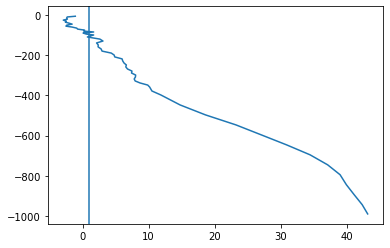

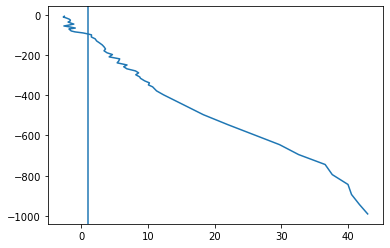

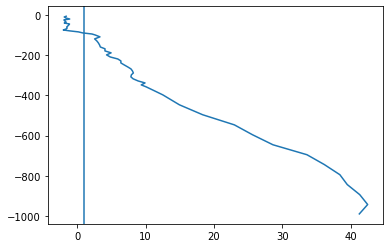

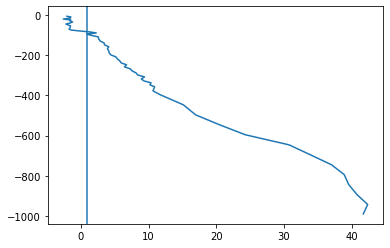

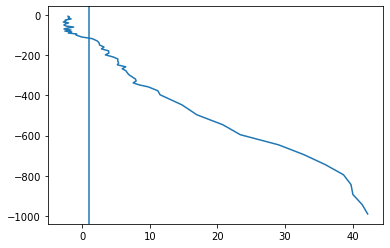

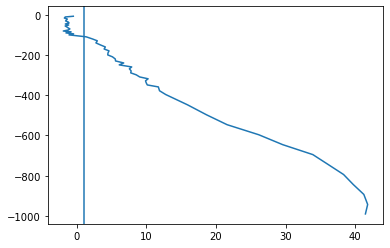

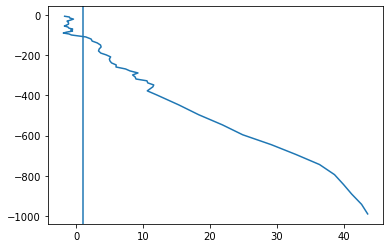

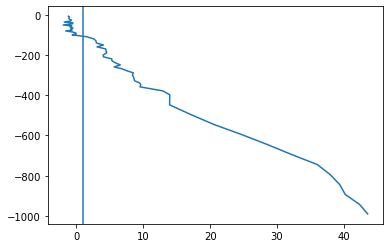

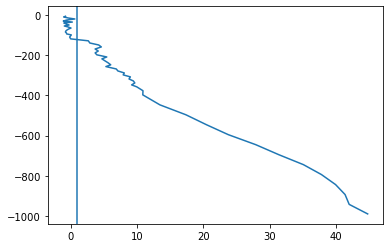

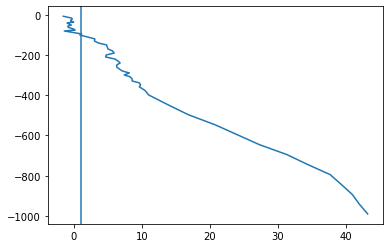

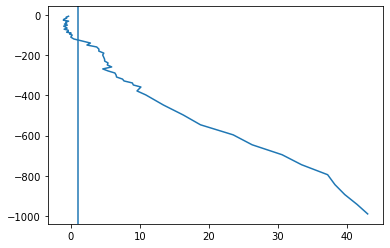

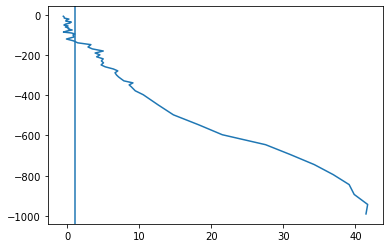

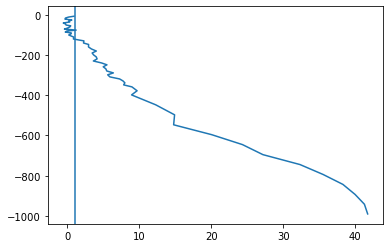

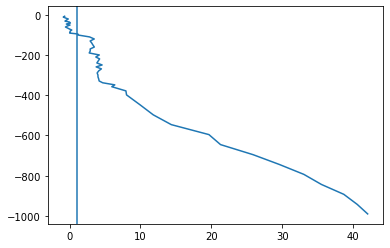

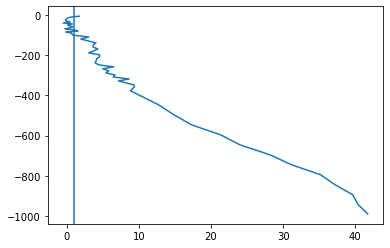

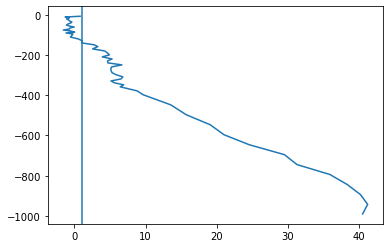

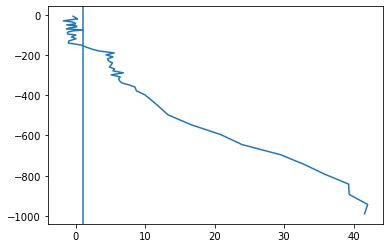

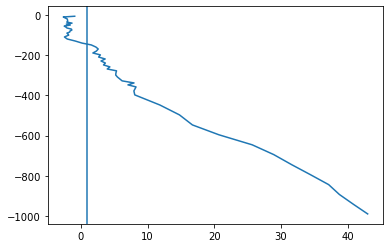

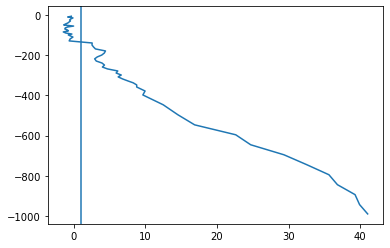

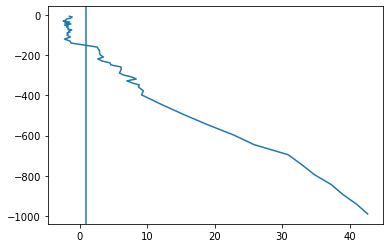

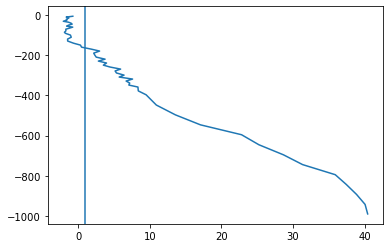

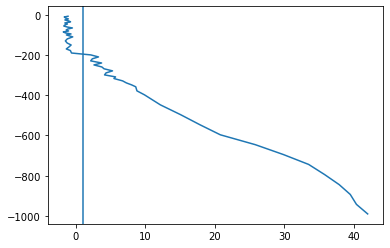

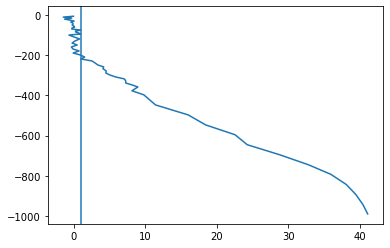

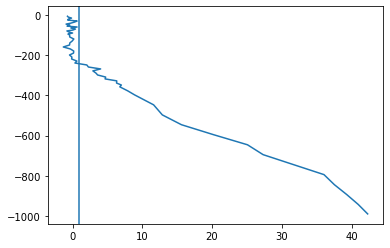

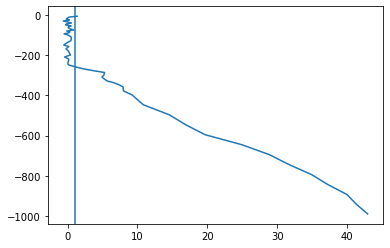

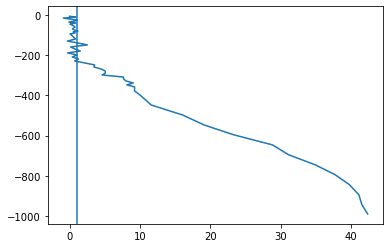

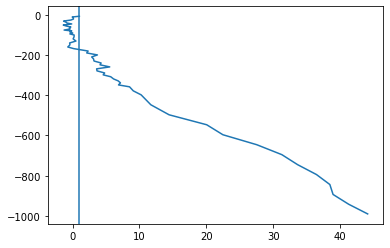

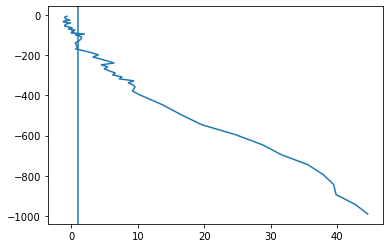

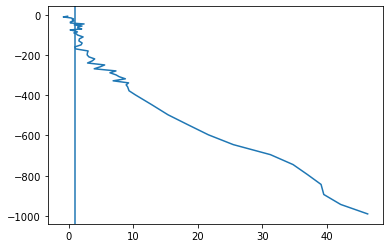

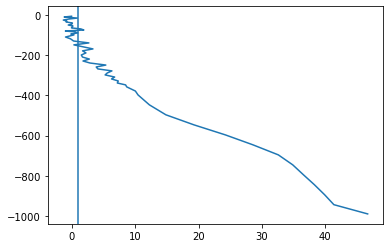

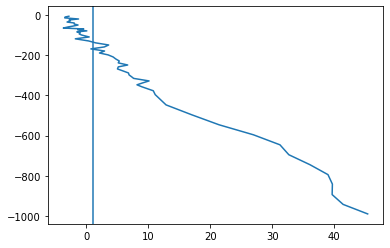

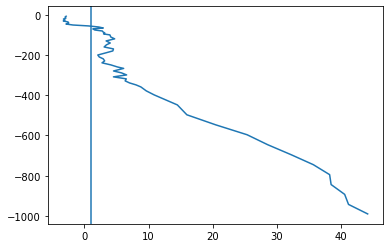

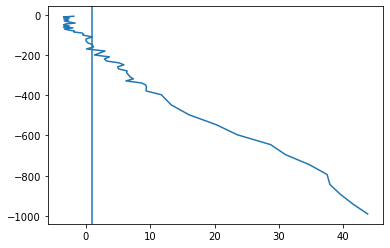

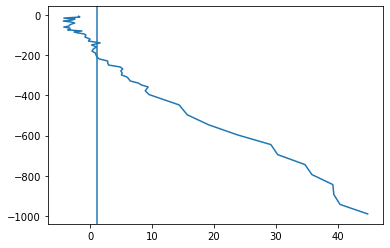

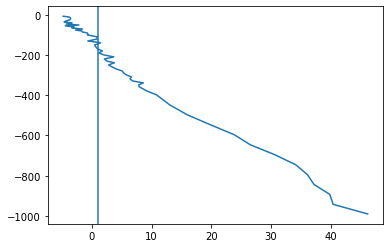

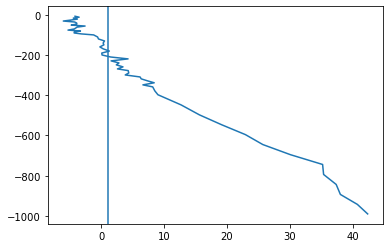

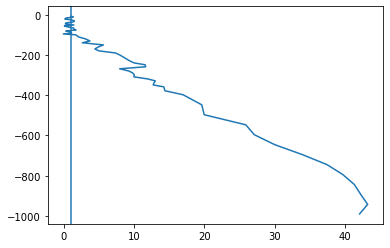

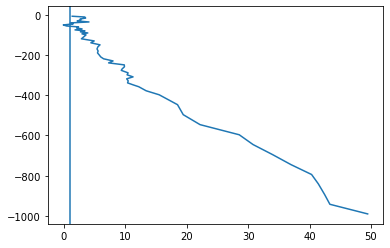

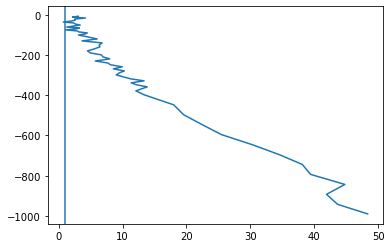

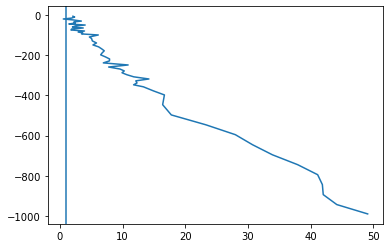

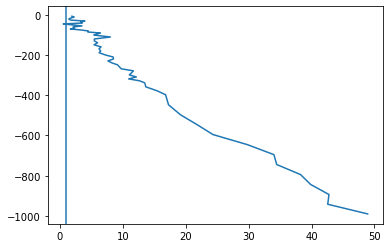

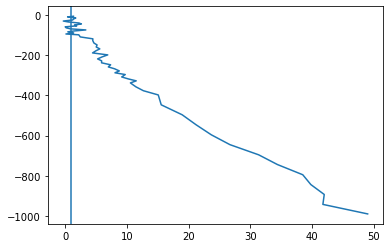

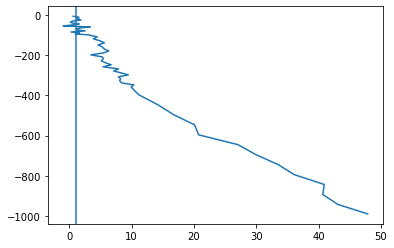

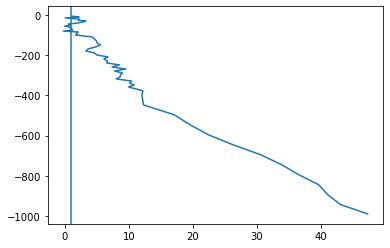

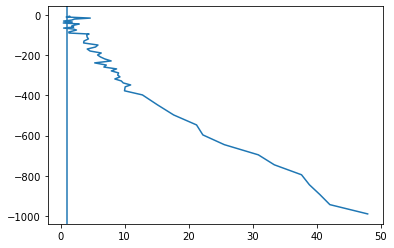

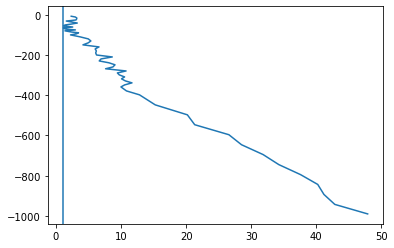

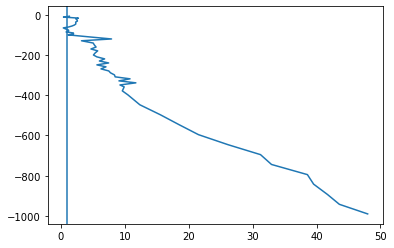

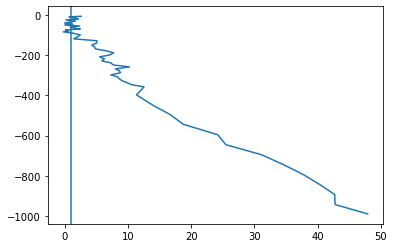

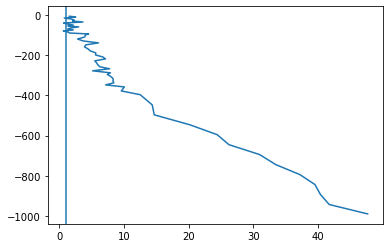

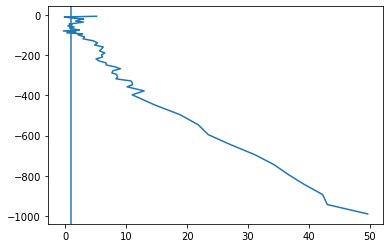

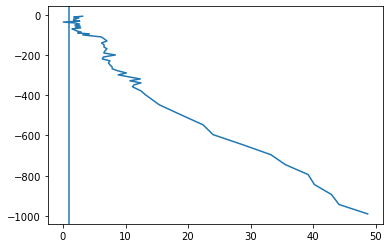

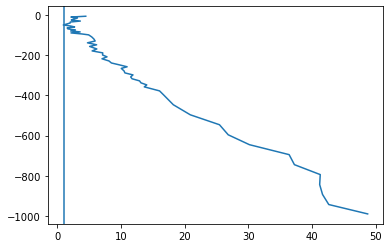

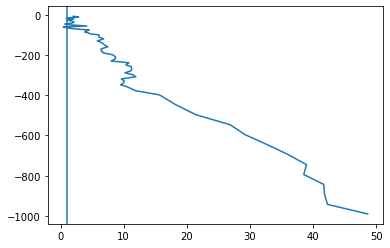

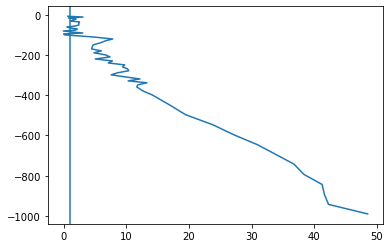

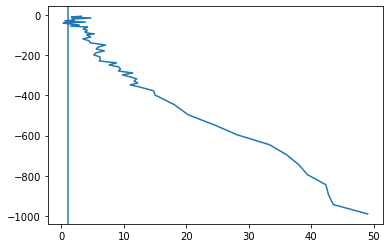

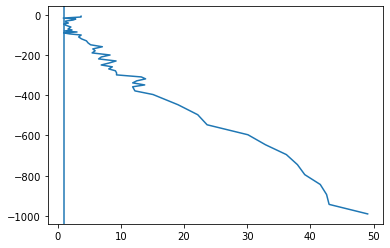

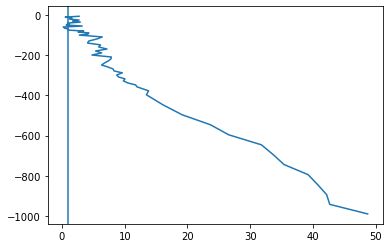

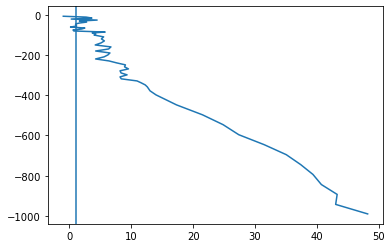

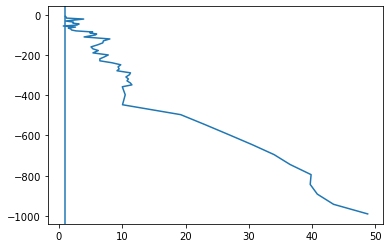

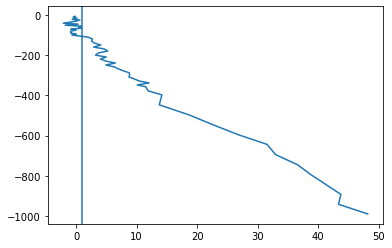

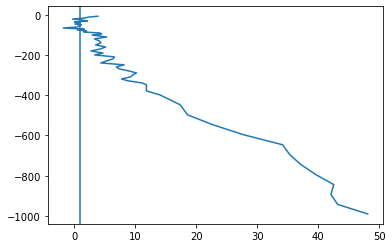

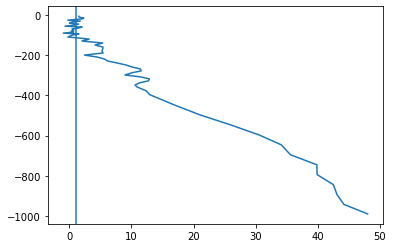

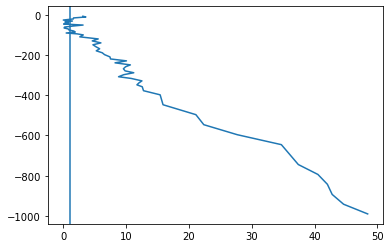

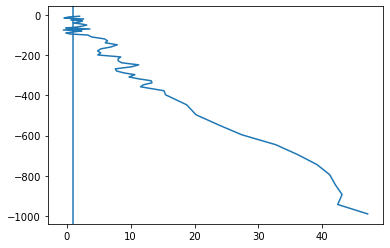

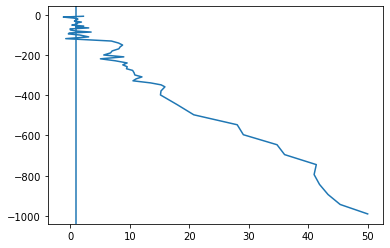

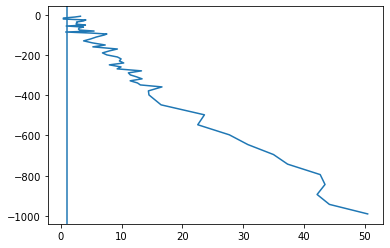

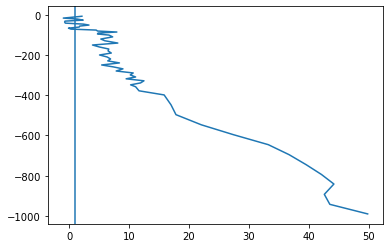

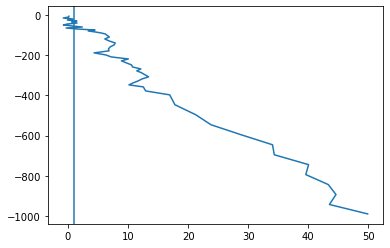

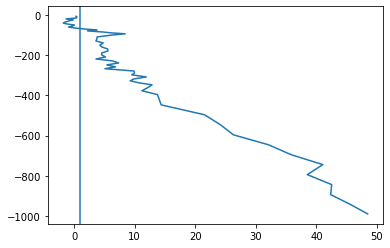

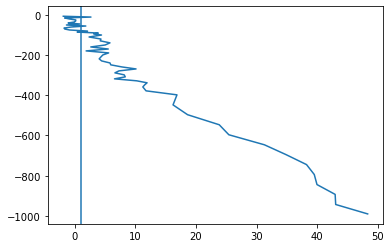

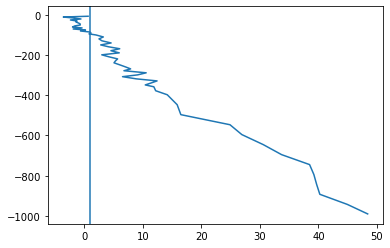

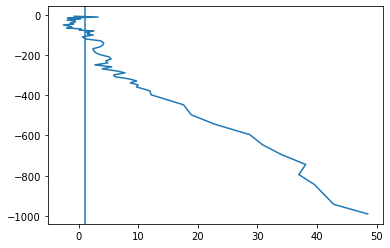

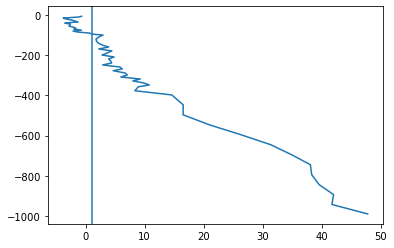

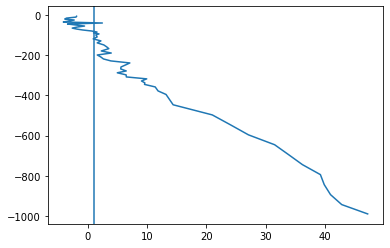

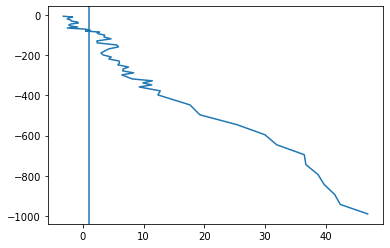

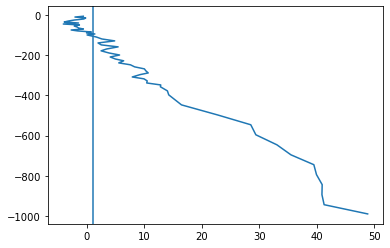

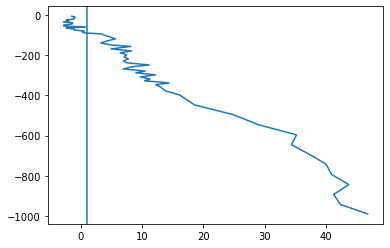

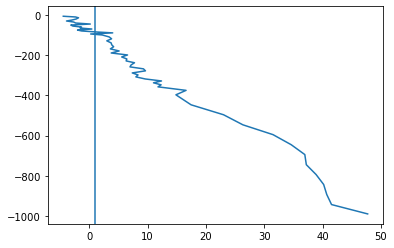

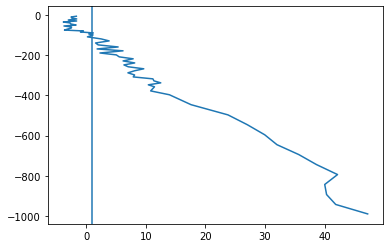

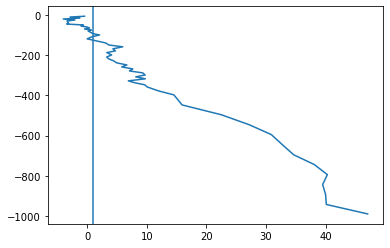

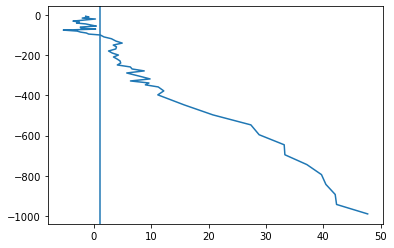

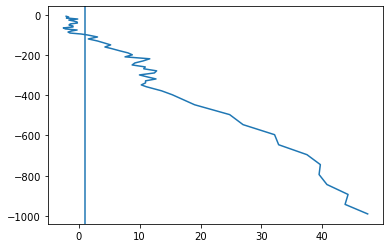

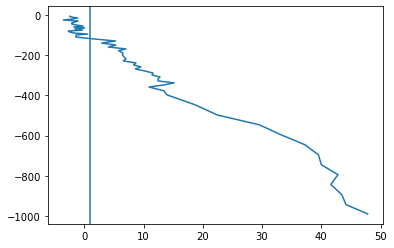

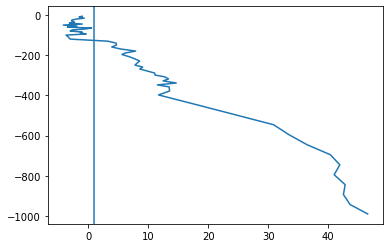

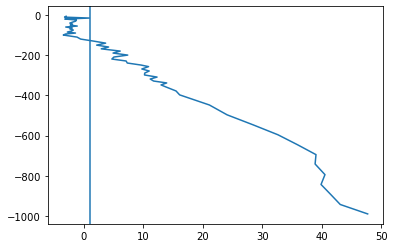

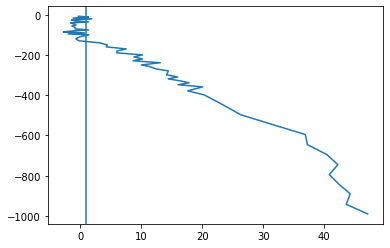

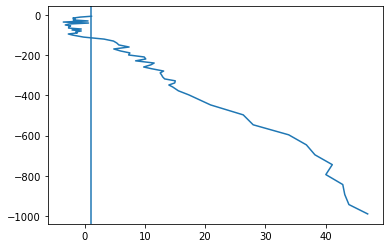

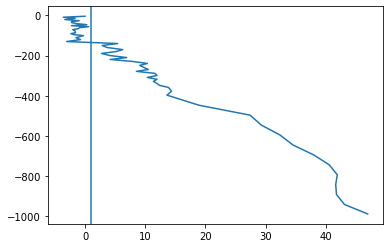

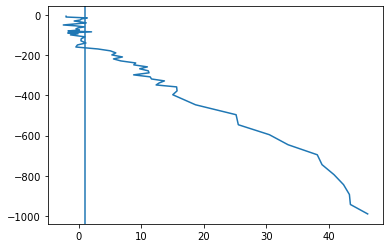

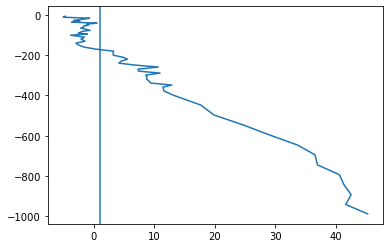

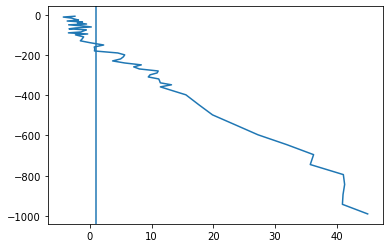

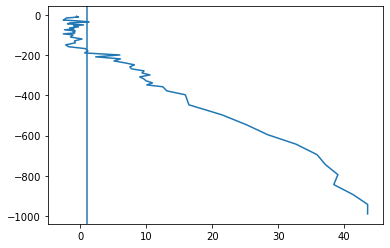

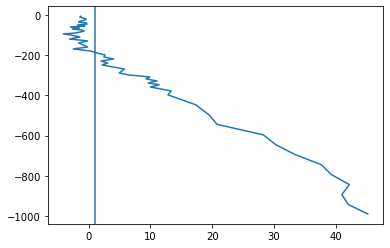

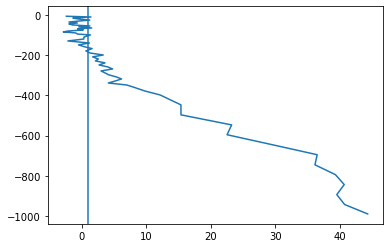

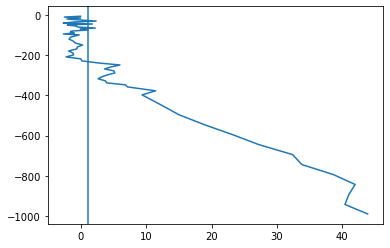

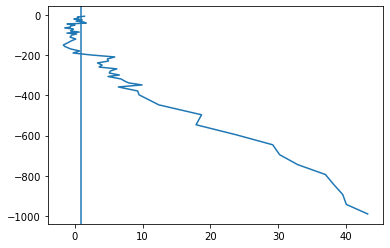

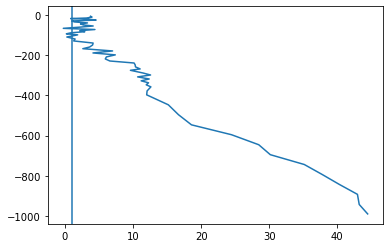

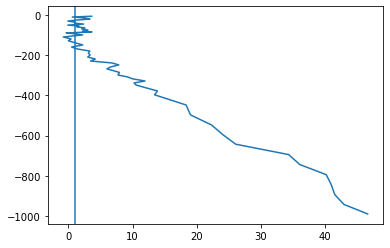

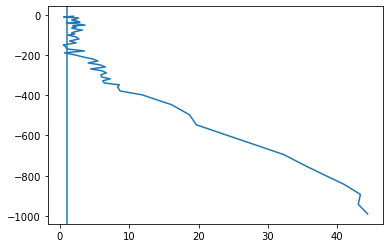

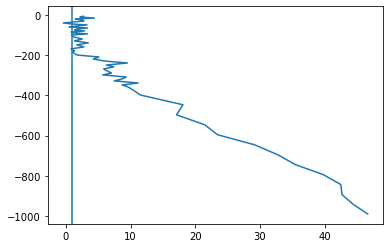

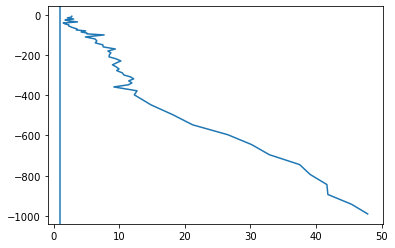

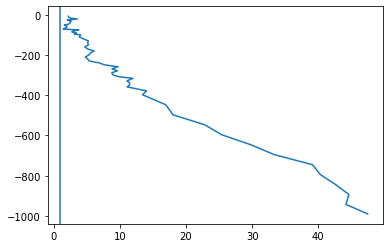

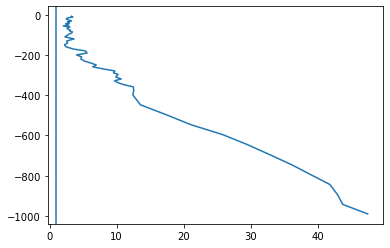

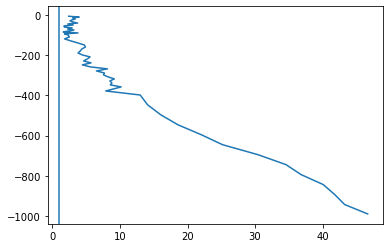

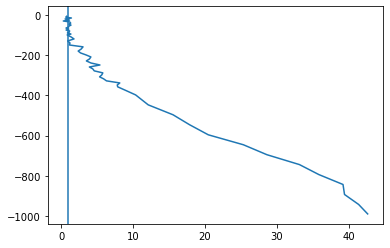

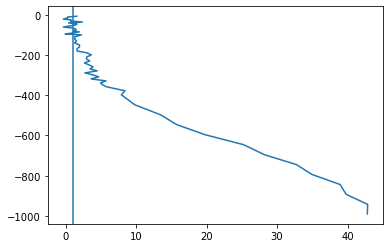

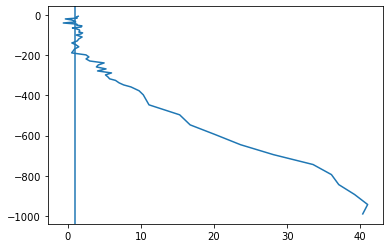

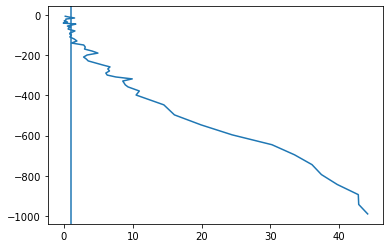

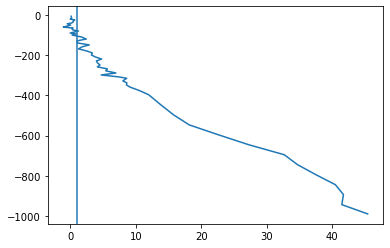

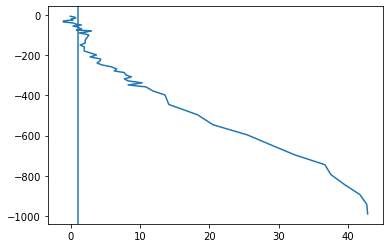

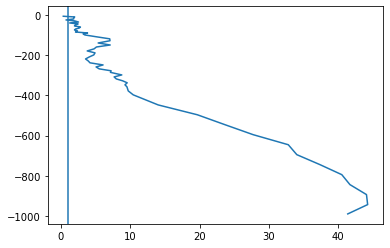

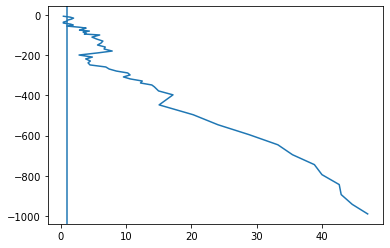

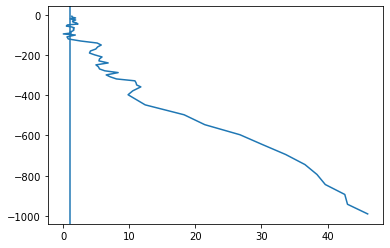

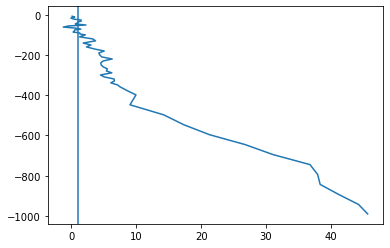

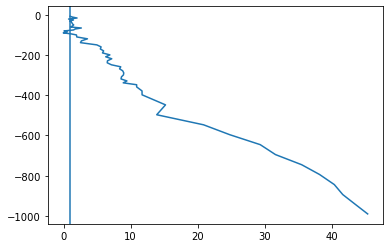

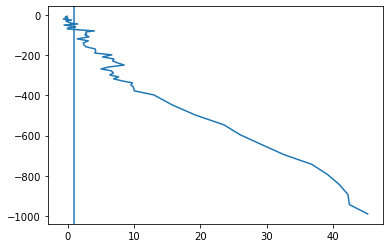

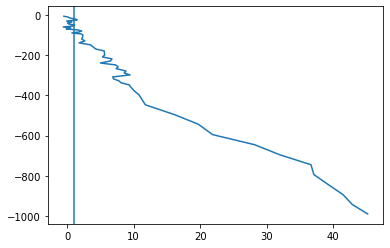

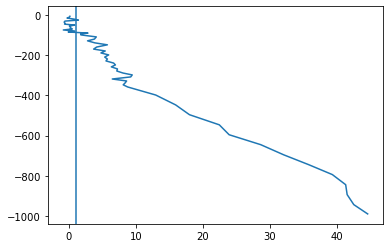

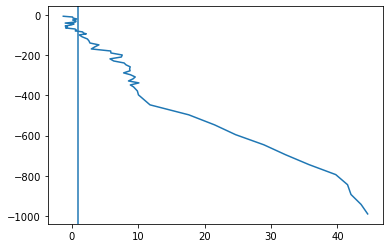

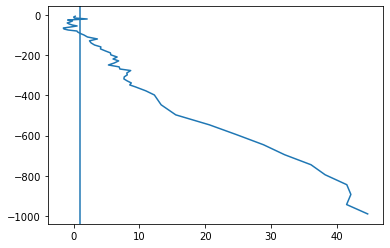

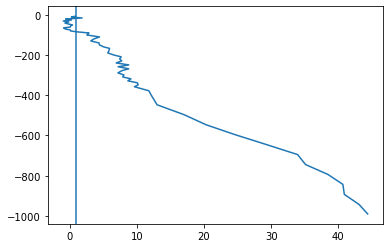

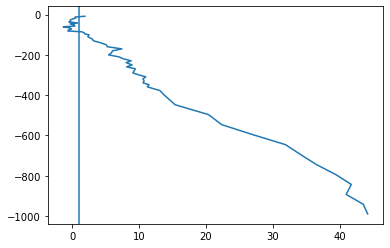

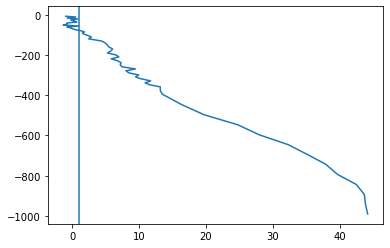

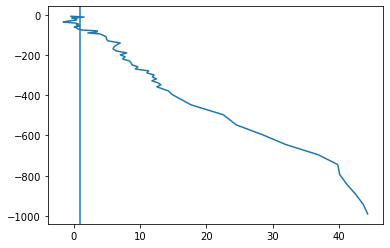

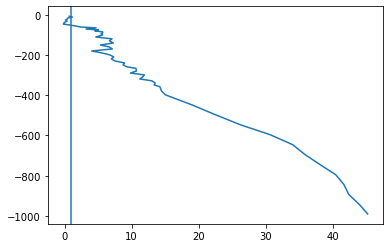

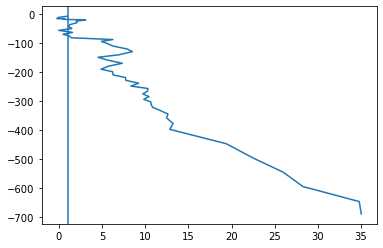

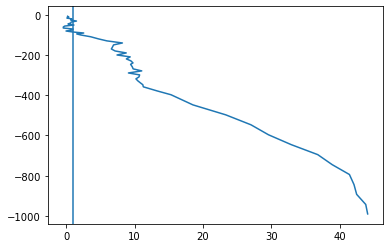

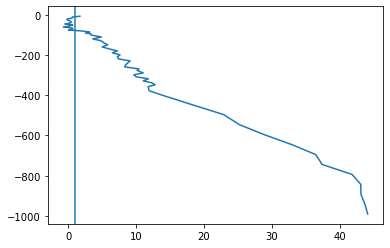

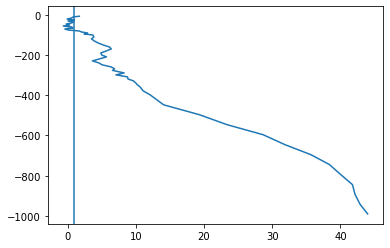

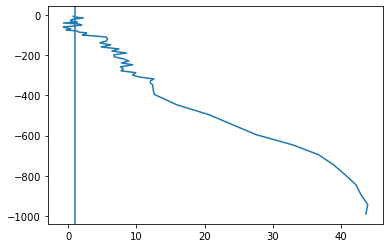

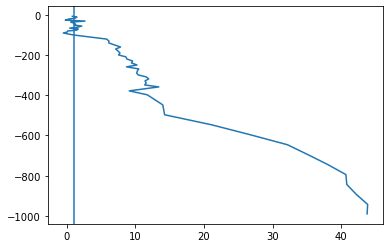

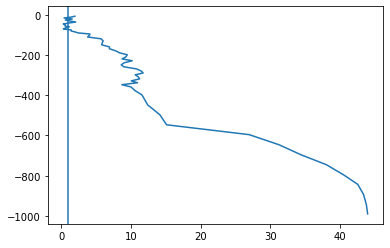

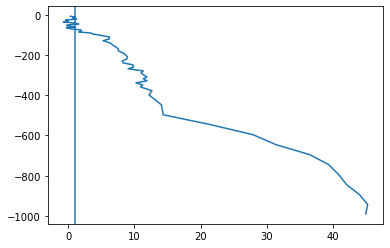

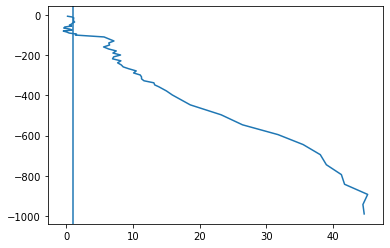

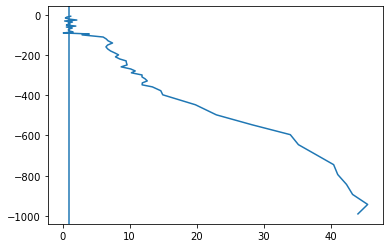

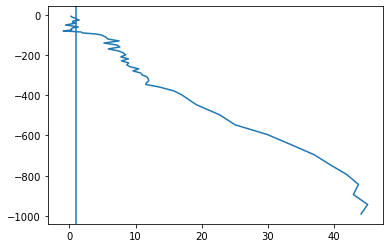

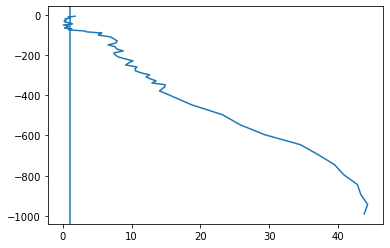

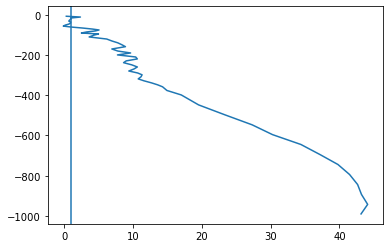

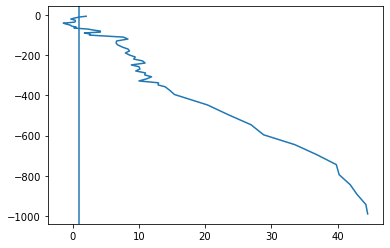

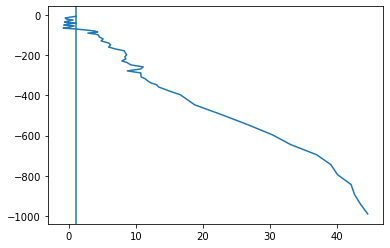

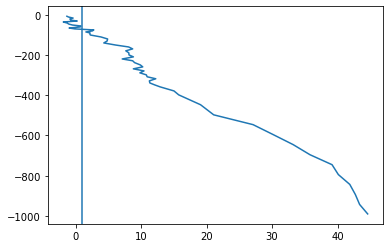

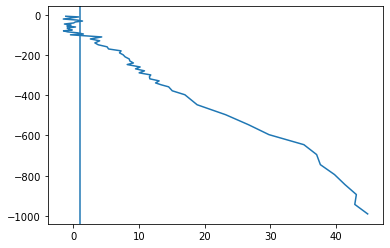

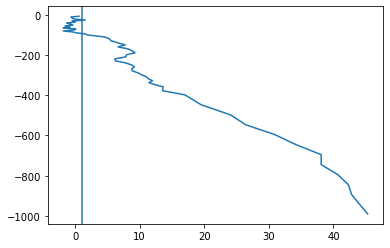

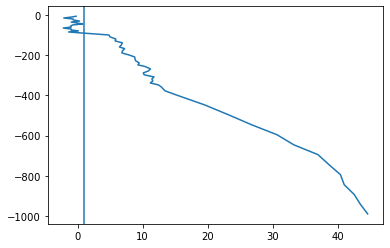

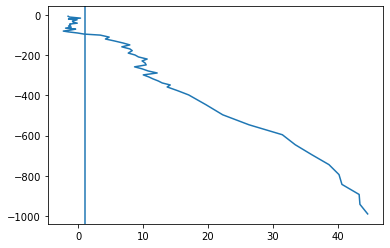

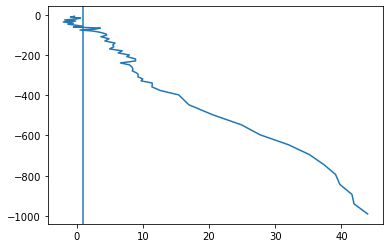

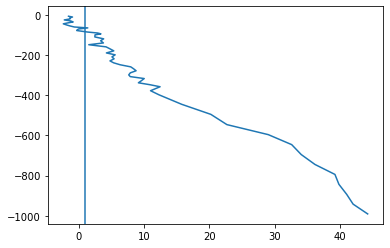

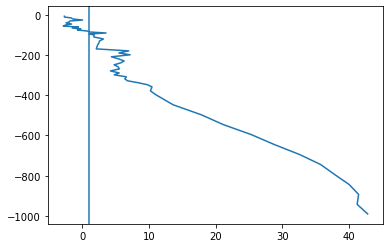

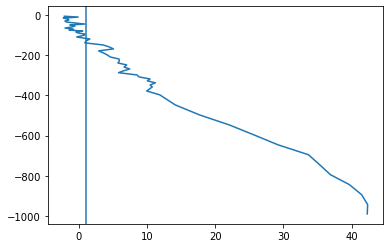

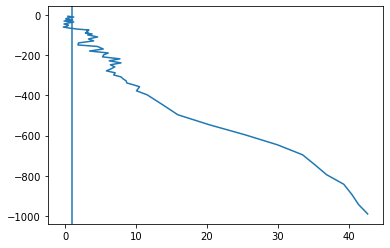

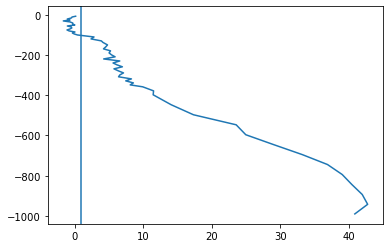

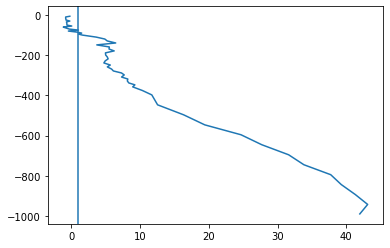

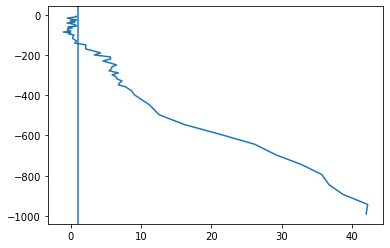

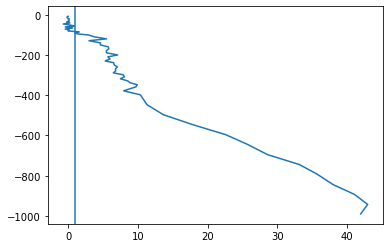

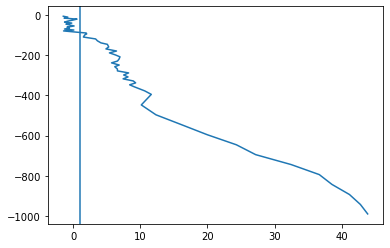

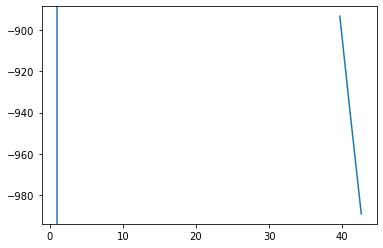

../../kuroshio_productivity/data/argo/7674KUROSHIOQC.txt 270  casts, DONE


In [18]:
# import QC'd nitrate profiles

# infiles = glob('../data/argo/*.TXT')
infiles = glob('../../kuroshio_productivity/data/argo/*.txt')

column_names = ["lon", "lat", "znut", "mon/day/yr"]
nutc = pd.DataFrame(columns = column_names)

string = "Cruise"
enc = 'cp1252'

for f in infiles:
    num = get_header_line(f, enc, string)
            
#     data = pd.read_csv(f, header = num, encoding = enc, sep = '\t', on_bad_lines = 'skip')
    df = pd.read_csv(f, header = 0)
   
    crit = 1.0
    
    # counter to keep track of number of casts
    cc = 0 
    
    for c in pd.unique(df['Date/GMT']):
        casts = df[(df['Date/GMT']==c) & (df['NITRATE[UMOL/KG]'] != -1e10) ]
        tmp = pd.DataFrame()
        
        if not casts.empty:
            cc += 1
#             znut = get_nutricline(crit, casts['NITRATE[UMOL/KG]'], casts['DEPTH[M]'])
                        
#             tmp['mon/day/yr'] = c
#             tmp['znut'] = znut
#             tmp['lat'] = casts[casts.columns[6]].iloc[1]
#             tmp['lon'] = casts[casts.columns[5]].iloc[1]
#             nutc = pd.concat([nutc, tmp], ignore_index = True)

            plt.plot(casts['NITRATE[UMOL/KG]'], casts['DEPTH[M]'])
#             plt.plot(crit, znut, 'or')
            plt.axvline(1.0)
            plt.show()

            
    print(f, cc, ' casts, DONE')

(array([], dtype=int64),)


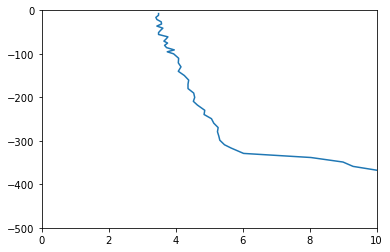

In [15]:
ff = np.where(casts['NITRATE[UMOL/KG]'] == 1.0)
print(ff)

plt.plot(casts['NITRATE[UMOL/KG]'], casts['DEPTH[M]'])
plt.ylim([-500,0])
plt.xlim([0,10])
plt.show()